In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here"s several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk("/kaggle/input"):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import warnings

warnings.filterwarnings("ignore")

# 读取数据

In [3]:
train_data = pd.read_csv("./data/sh518880.csv")
train_data = train_data.iloc[:-1, :]
train_data.head()

date   open   high    low  close    volume  p_change  forecast
0  2013-07-30  2.632  2.648  2.632  2.646  92993112  0.007616       1.0
1  2013-07-31  2.643  2.659  2.640  2.657  69976160  0.004157       0.0
2  2013-08-01  2.653  2.656  2.635  2.643  30006438 -0.005269       0.0
3  2013-08-02  2.630  2.632  2.558  2.578  33021892 -0.024593       1.0
4  2013-08-05  2.621  2.642  2.621  2.630  24012032  0.020171       0.0

In [4]:
test_data = pd.read_csv("./data/sh518880.csv")
test_data = test_data.iloc[:-1, :]
test_data.head()

date   open   high    low  close    volume  p_change  forecast
0  2013-07-30  2.632  2.648  2.632  2.646  92993112  0.007616       1.0
1  2013-07-31  2.643  2.659  2.640  2.657  69976160  0.004157       0.0
2  2013-08-01  2.653  2.656  2.635  2.643  30006438 -0.005269       0.0
3  2013-08-02  2.630  2.632  2.558  2.578  33021892 -0.024593       1.0
4  2013-08-05  2.621  2.642  2.621  2.630  24012032  0.020171       0.0

# Check Missing Value

In [5]:
from prettytable import PrettyTable
import missingno as msno
import matplotlib.pyplot as plt

table = PrettyTable()

table.field_names = ['Column Name', 'Data Type', 'Non-Null Count']
for column in train_data.columns:
    data_type = str(train_data[column].dtype)
    non_null_count = train_data[column].count()
    table.add_row([column, data_type, non_null_count])
print(table)

+-------------+-----------+----------------+
| Column Name | Data Type | Non-Null Count |
+-------------+-----------+----------------+
|     date    |   object  |      2563      |
|     open    |  float64  |      2563      |
|     high    |  float64  |      2563      |
|     low     |  float64  |      2563      |
|    close    |  float64  |      2563      |
|    volume   |   int64   |      2563      |
|   p_change  |  float64  |      2563      |
|   forecast  |  float64  |      2563      |
+-------------+-----------+----------------+


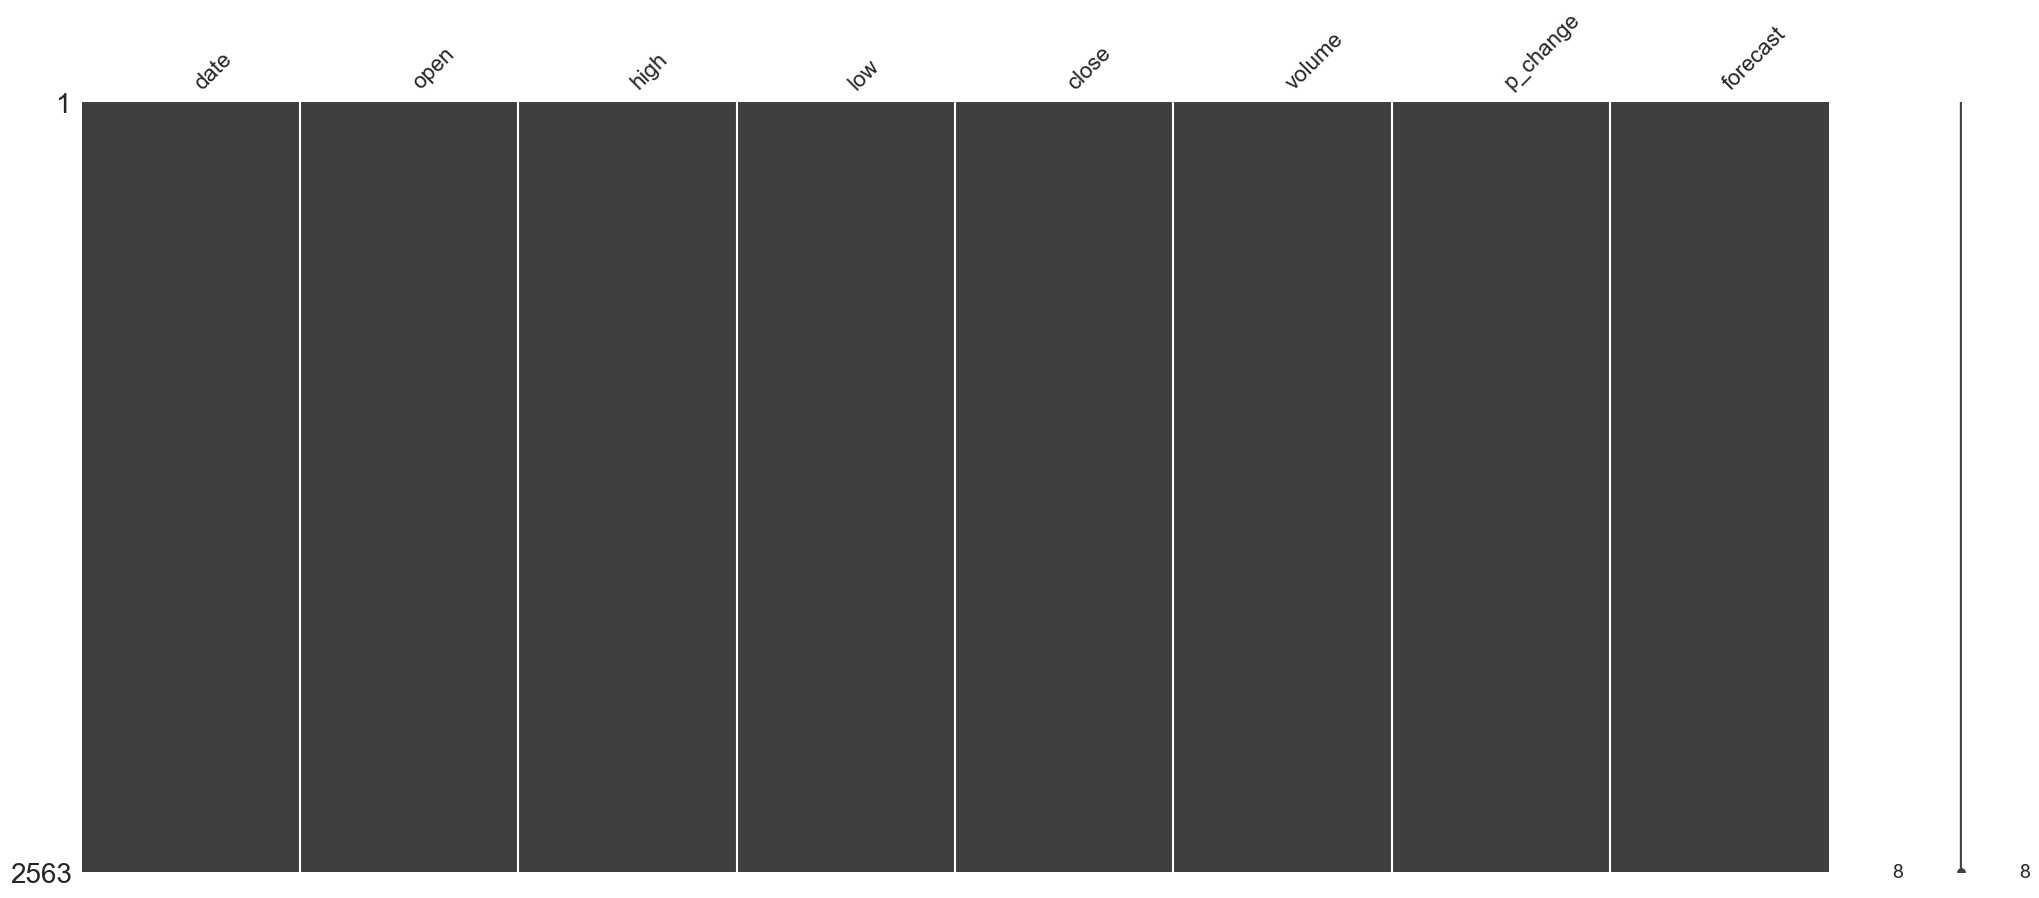

In [6]:
msno.matrix(train_data)
plt.show()

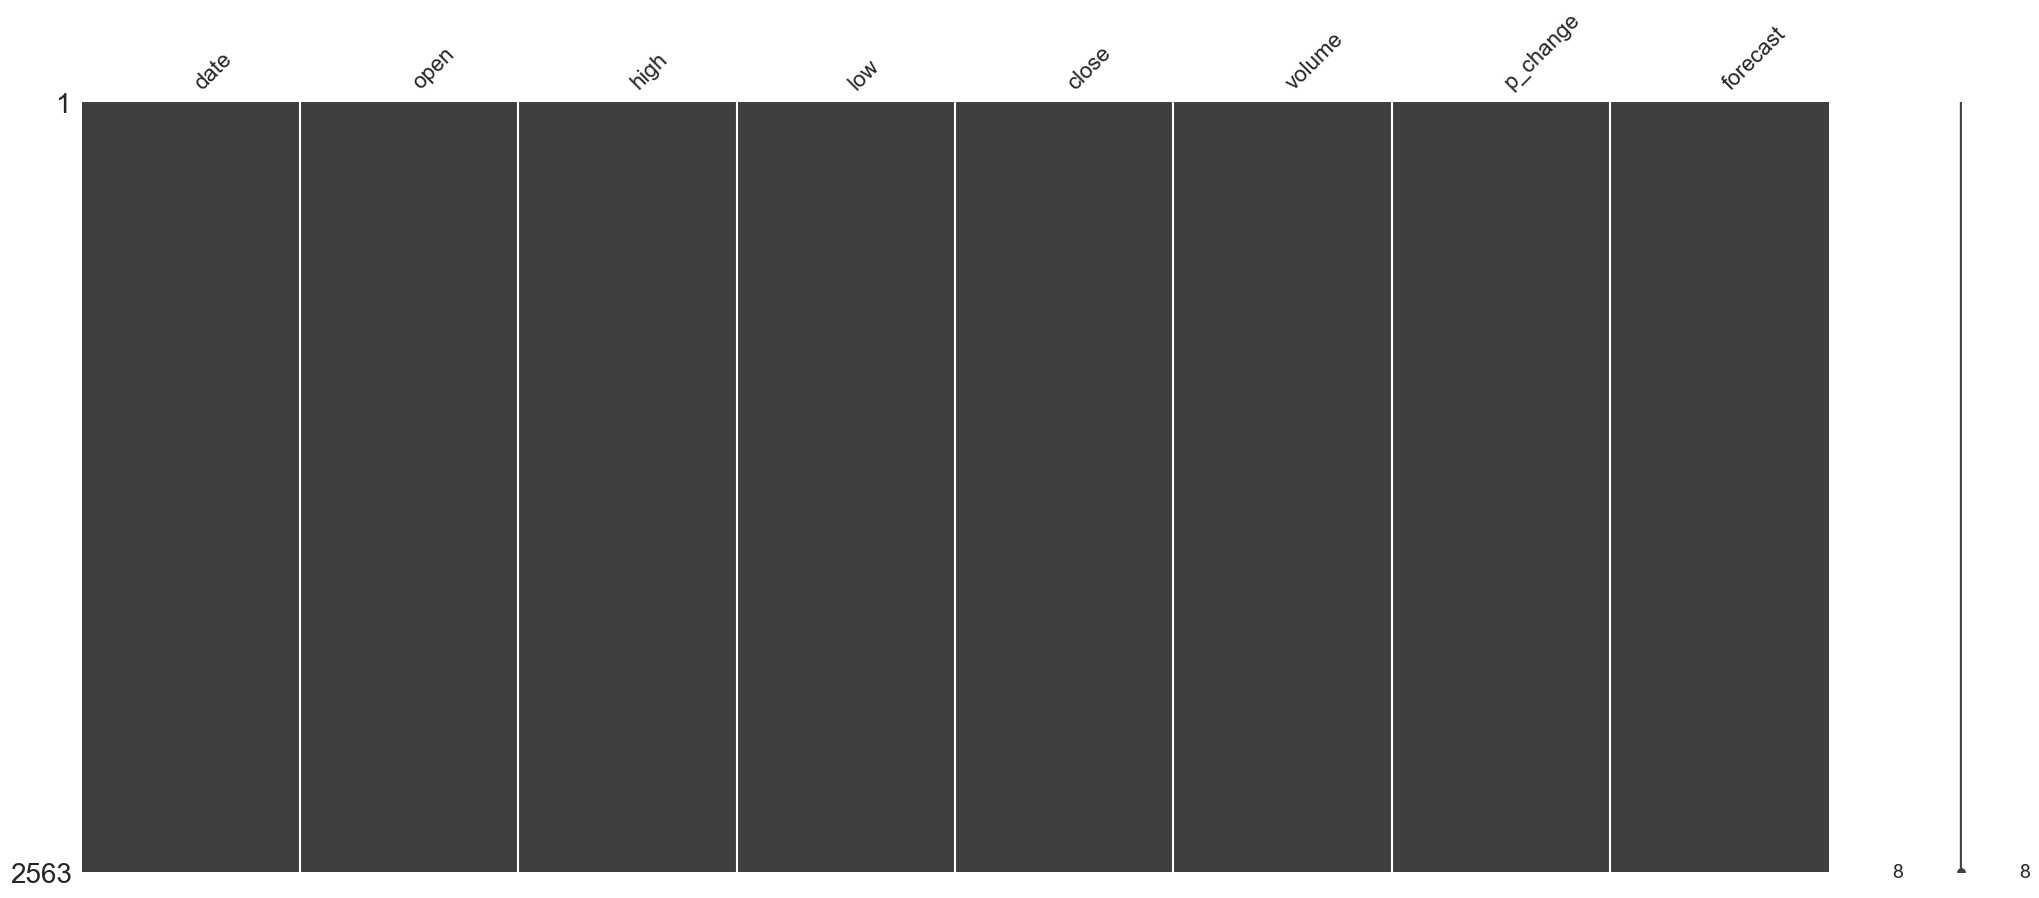

In [7]:
msno.matrix(test_data)
plt.show()

# Train & Test data

['open', 'high', 'low', 'close', 'p_change']


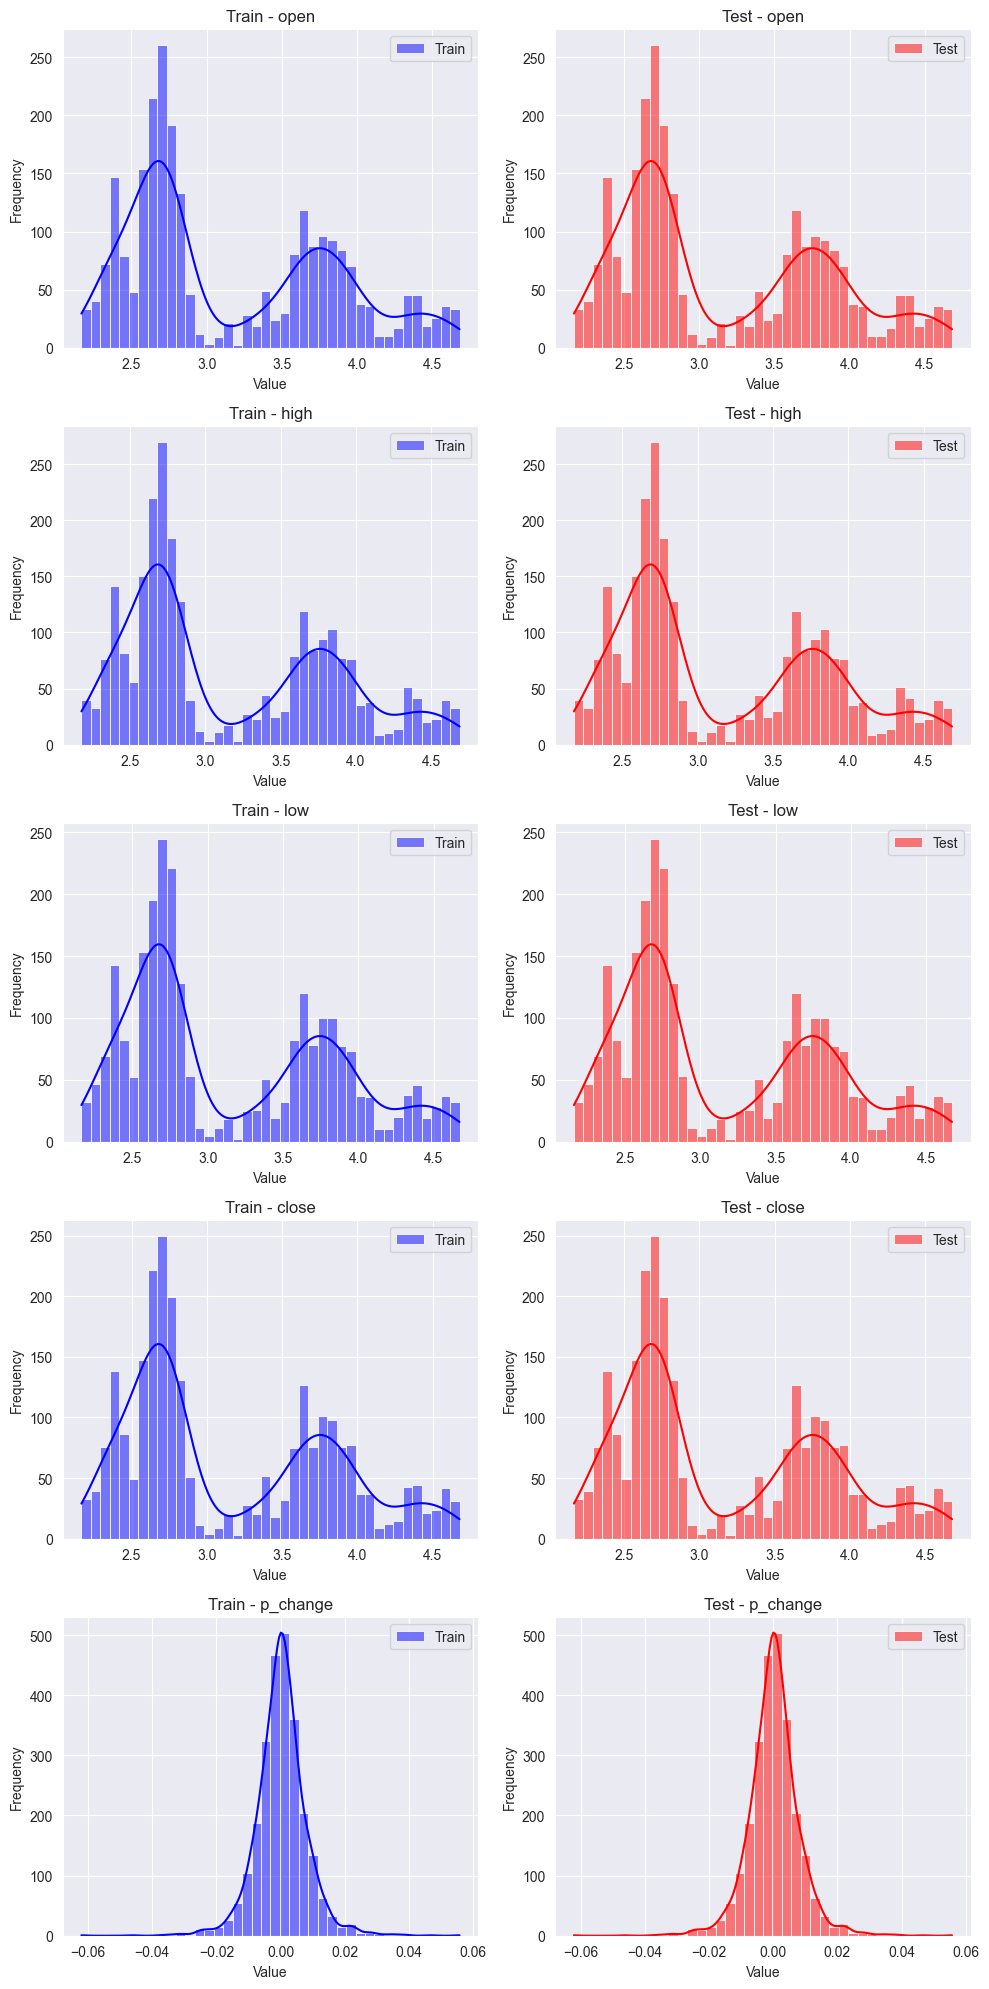

In [8]:
import seaborn as sns

cont_cols=[f for f in train_data.columns if train_data[f].dtype in [float,int] and train_data[f].nunique()>3]
print(cont_cols)

# Create subplots for each continuous column
fig, axs = plt.subplots(len(cont_cols), 2, figsize=(10,20))

# Loop through each continuous column and plot the histograms
for i, col in enumerate(cont_cols):
    # Determine the range of values to plot
    max_val = max(train_data[col].max(), test_data[col].max())
    min_val = min(train_data[col].min(), test_data[col].min())
    range_val = max_val - min_val
    
    # Determine the bin size and number of bins
    max_size = 40
    bin_size = range_val / max_size
    num_bins_train = round(range_val / bin_size)
    num_bins_test = round(range_val / bin_size)
    
    # Plot the histograms
    sns.histplot(train_data[col], ax=axs[i][0], color='blue', kde=True, label='Train', bins=num_bins_train)
    sns.histplot(test_data[col], ax=axs[i][1], color='red', kde=True, label='Test', bins=num_bins_test)
    axs[i][0].set_title(f'Train - {col}')
    axs[i][0].set_xlabel('Value')
    axs[i][0].set_ylabel('Frequency')
    axs[i][1].set_title(f'Test - {col}')
    axs[i][1].set_xlabel('Value')
    axs[i][1].set_ylabel('Frequency')
    axs[i][0].legend()
    axs[i][1].legend()

plt.tight_layout()
plt.show()

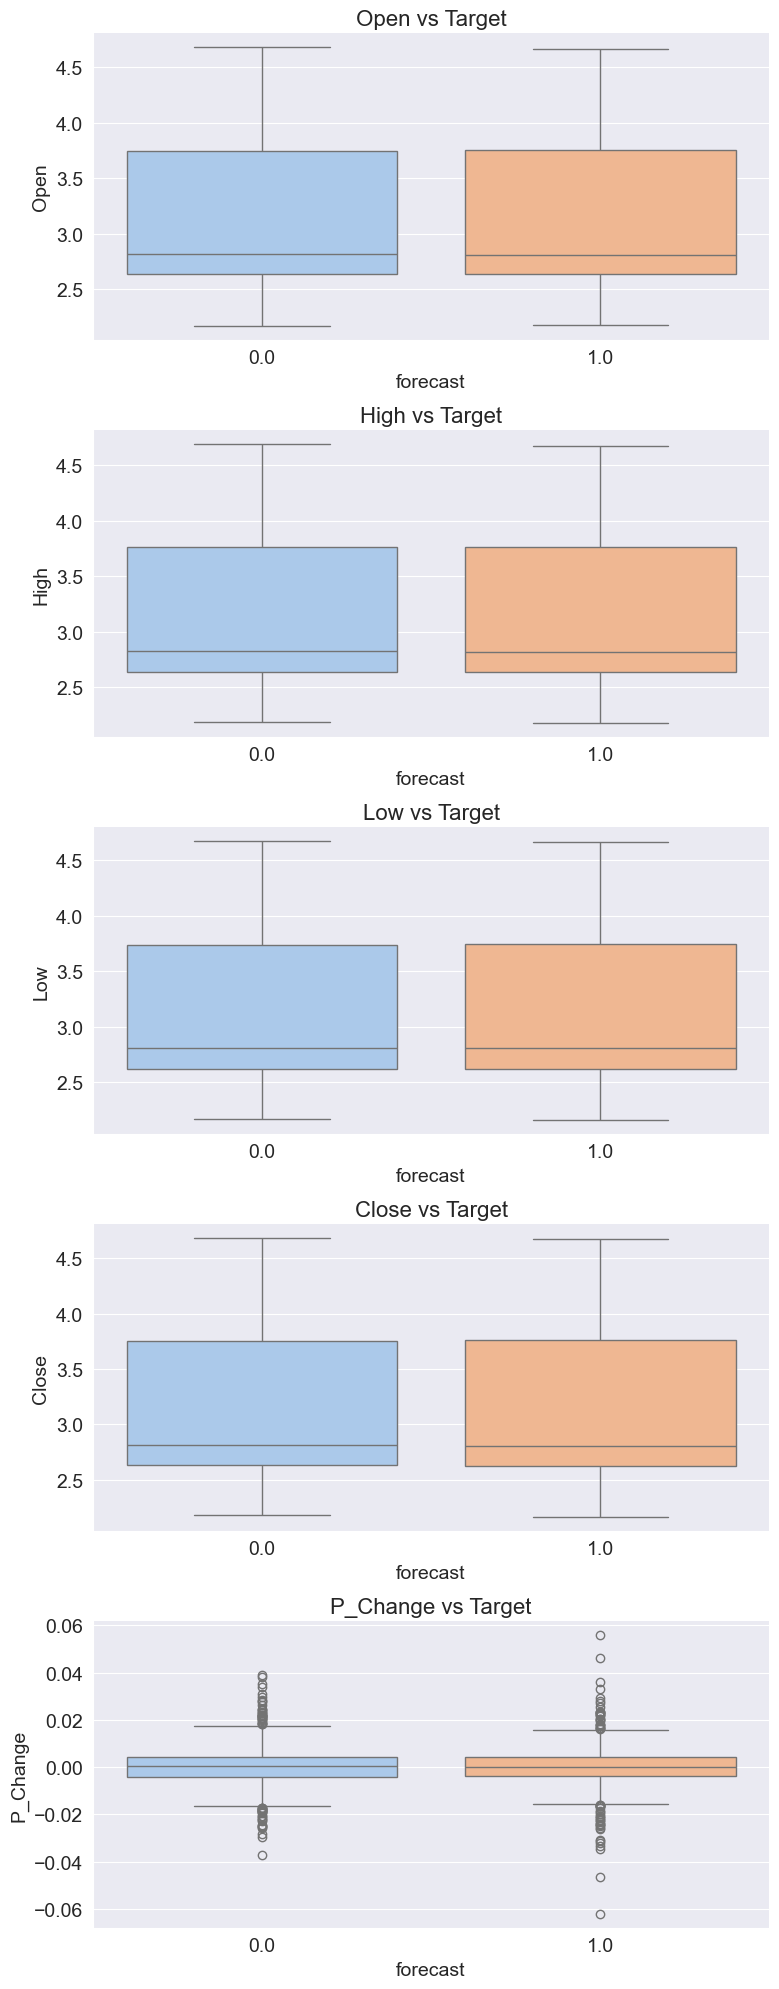

In [9]:
# Create subplots for each continuous feature
fig, axs = plt.subplots(nrows=len(cont_cols), figsize=(8, 4 * len(cont_cols)))
for i, col in enumerate(cont_cols):
    sns.boxplot(x='forecast', y=col, data=train_data, ax=axs[i], palette='pastel')
    axs[i].set_title(f'{col.title()} vs Target', fontsize=16)
    axs[i].set_xlabel('forecast', fontsize=14)
    axs[i].set_ylabel(col.title(), fontsize=14)
    axs[i].tick_params(axis='both', labelsize=14)
    sns.despine()

# Adjust spacing between subplots
fig.tight_layout()

# Display the plot
plt.show()

## 多变量分析

### pair

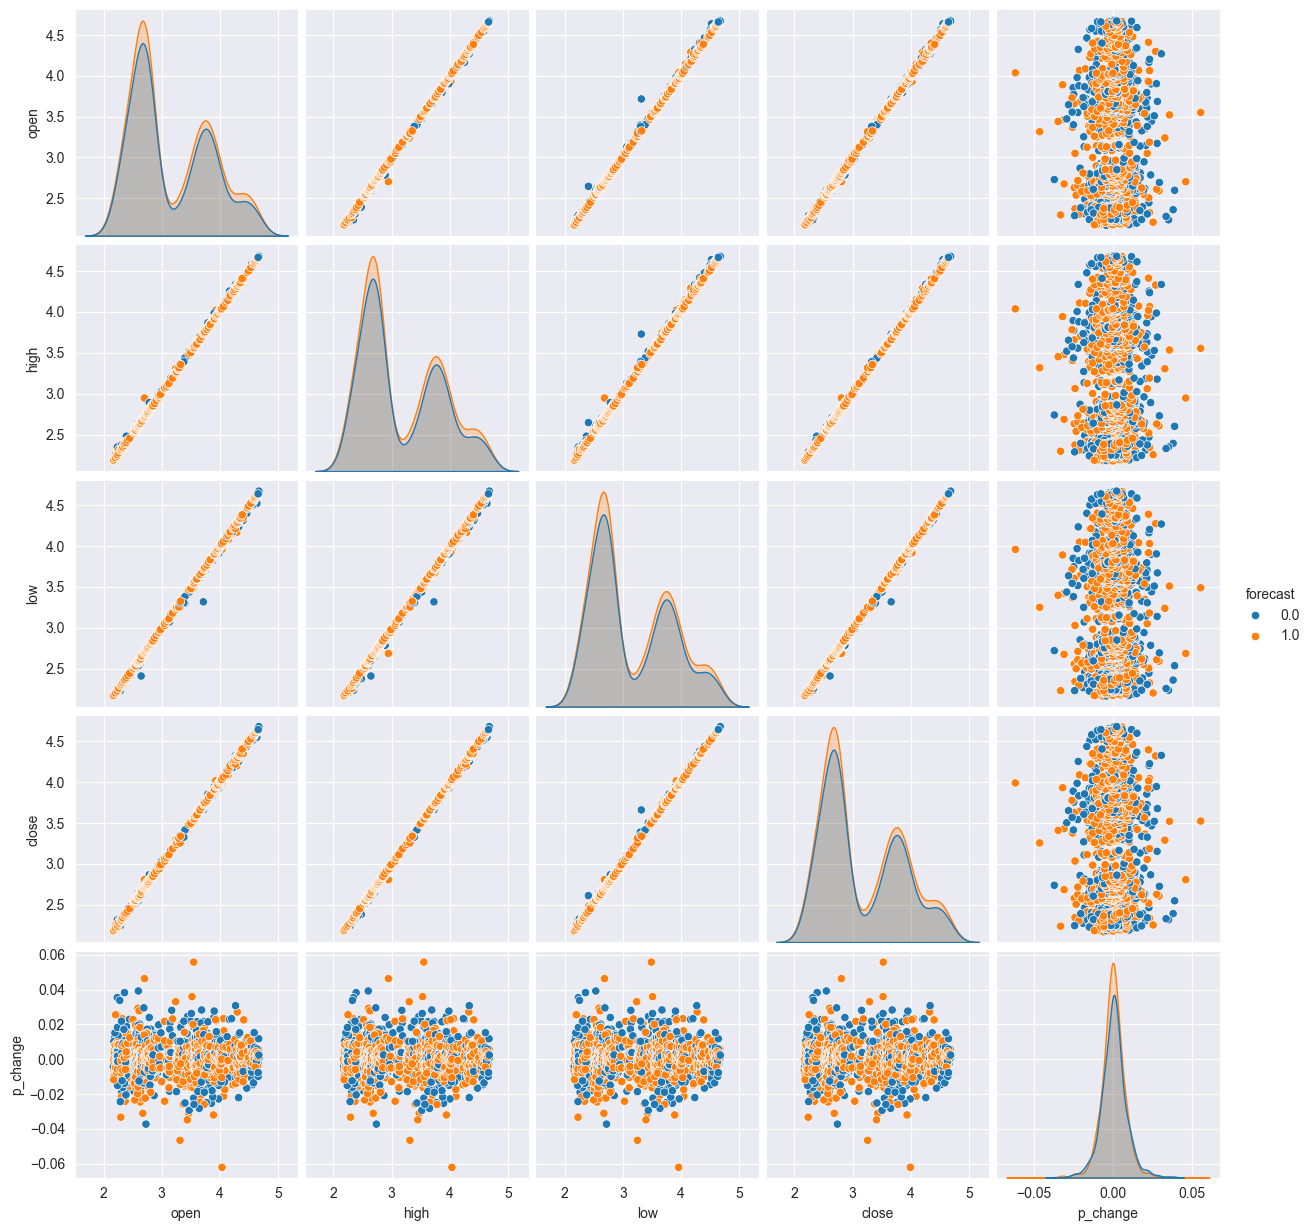

In [10]:
sns.pairplot(data=train_data, vars=cont_cols, hue='forecast')
plt.show()

### Violin

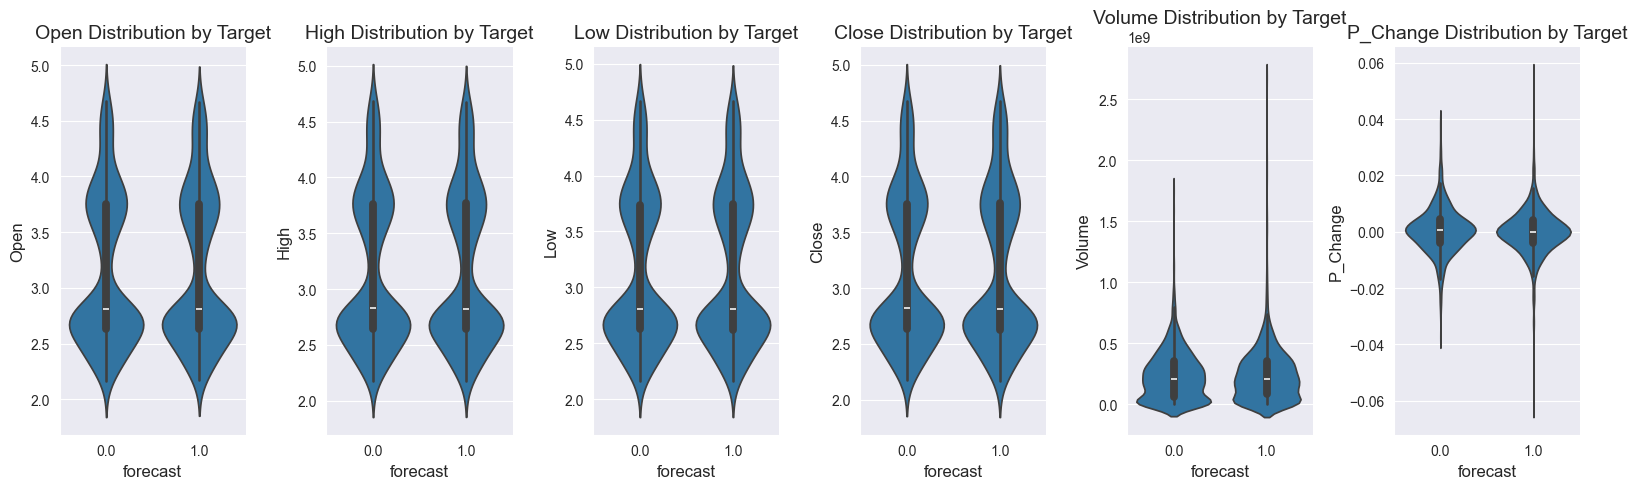

In [11]:
# Define the numerical features to plot
features=['open', 'high', 'low', 'close', 'volume', 'p_change']

# Create a figure with multiple subplots
fig, axs = plt.subplots(1, len(features), figsize=(16, 5))

# Loop through each feature and plot a violin plot on a separate subplot
for i, col in enumerate(features):
    sns.violinplot(x='forecast', y=col, data=train_data, ax=axs[i])
    axs[i].set_title(f'{col.title()} Distribution by Target', fontsize=14)
    axs[i].set_xlabel('forecast', fontsize=12)
    axs[i].set_ylabel(col.title(), fontsize=12)
    sns.despine()

# Adjust spacing between subplots
fig.tight_layout()

# Display the plot
plt.show()

### t-test

In [12]:
from scipy.stats import ttest_ind

def perform_ttest(train, feature_list, target):
    """
    Performs t-test on a list of independent features for a binary classification problem
    
    :param train: pandas dataframe containing the training data
    :param feature_list: list of feature names to perform t-test on
    :param target: name of the target variable (binary)
    :return: dictionary containing t-test results
    """
    ttest_results = {}
    table = PrettyTable()

    table.field_names = ['Feature', 't_stat', 'p_val']
    
    for feature in feature_list:
        group_0 = train[train[target] == 0][feature]
        group_1 = train[train[target] == 1][feature]
        
        t_stat, p_val = ttest_ind(group_0, group_1, nan_policy='omit')
        table.add_row([feature,t_stat, p_val ])
        
    return print(table)

perform_ttest(train_data, cont_cols, 'forecast')

+----------+---------------------+---------------------+
| Feature  |        t_stat       |        p_val        |
+----------+---------------------+---------------------+
|   open   | -0.4226856157176236 |  0.6725601377496971 |
|   high   |  -0.401382138301183 |  0.6881722861946646 |
|   low    | -0.4662090303587514 |  0.6411055362403963 |
|  close   | -0.4303122273242808 |  0.667004741474891  |
| p_change |  1.5035351548194942 | 0.13282439873435356 |
+----------+---------------------+---------------------+


### ANOVA

In [13]:
from scipy.stats import f_oneway

def perform_anova(train, feature_list, target):
    """
    Performs ANOVA on a list of independent features for a binary classification problem
    
    :param train: pandas dataframe containing the training data
    :param feature_list: list of feature names to perform ANOVA on
    :param target: name of the target variable (binary)
    :return: dictionary containing ANOVA results
    """
    anova_results = {}
    table = PrettyTable()
    
    table.field_names = ['Feature', 'F-statistic', 'p-value']
    
    for feature in feature_list:
        groups = []
        for group_value in train[target].unique():
            group = train[train[target] == group_value][feature].dropna()
            groups.append(group)
        
        f_stat, p_val = f_oneway(*groups)
        table.add_row([feature, f_stat, p_val])
        
    return print(table)

perform_anova(train_data, cont_cols, 'forecast')

+----------+---------------------+--------------------+
| Feature  |     F-statistic     |      p-value       |
+----------+---------------------+--------------------+
|   open   |  0.1786631297345764 | 0.6725601377508066 |
|   high   | 0.16110762094722691 | 0.6881722861953172 |
|   low    | 0.21735085998804476 | 0.6411055362413411 |
|  close   | 0.18516861298479292 | 0.6670047414758487 |
| p_change |  2.2606179617780793 | 0.1328243987339479 |
+----------+---------------------+--------------------+


### Alternate Method to Pair Plots

In [14]:
from itertools import combinations
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

feature_pairs = list(combinations(cont_cols, 2))
table = PrettyTable()
table.field_names = ['Feature Pair', 'Accuracy']

# Fill missing values with the mean of the column
imputer = SimpleImputer(strategy='mean')
train_imputed = imputer.fit_transform(train_data[cont_cols])

for pair in feature_pairs:
    # Using the entire train data to fit, not a CV because it is time consuming
    x_temp = train_imputed[:, [cont_cols.index(pair[0]), cont_cols.index(pair[1])]]
    y_temp = train_data['forecast']
    model = SVC(gamma='auto')
    model.fit(x_temp, y_temp)
    y_pred = model.predict(x_temp)
    acc = accuracy_score(y_temp, y_pred)
    table.add_row([pair, acc])
table.sortby = 'Accuracy'
table.reversesort = True
print(table)

+-----------------------+--------------------+
|      Feature Pair     |      Accuracy      |
+-----------------------+--------------------+
|  ('open', 'p_change') | 0.5267264923917284 |
|    ('open', 'low')    | 0.5267264923917284 |
|    ('open', 'high')   | 0.5267264923917284 |
|   ('open', 'close')   | 0.5267264923917284 |
|  ('low', 'p_change')  | 0.5267264923917284 |
|    ('low', 'close')   | 0.5267264923917284 |
|  ('high', 'p_change') | 0.5267264923917284 |
|    ('high', 'low')    | 0.5267264923917284 |
|   ('high', 'close')   | 0.5267264923917284 |
| ('close', 'p_change') | 0.5267264923917284 |
+-----------------------+--------------------+


## Correlation Plot

['date', 'open', 'high', 'low', 'close', 'volume', 'p_change']


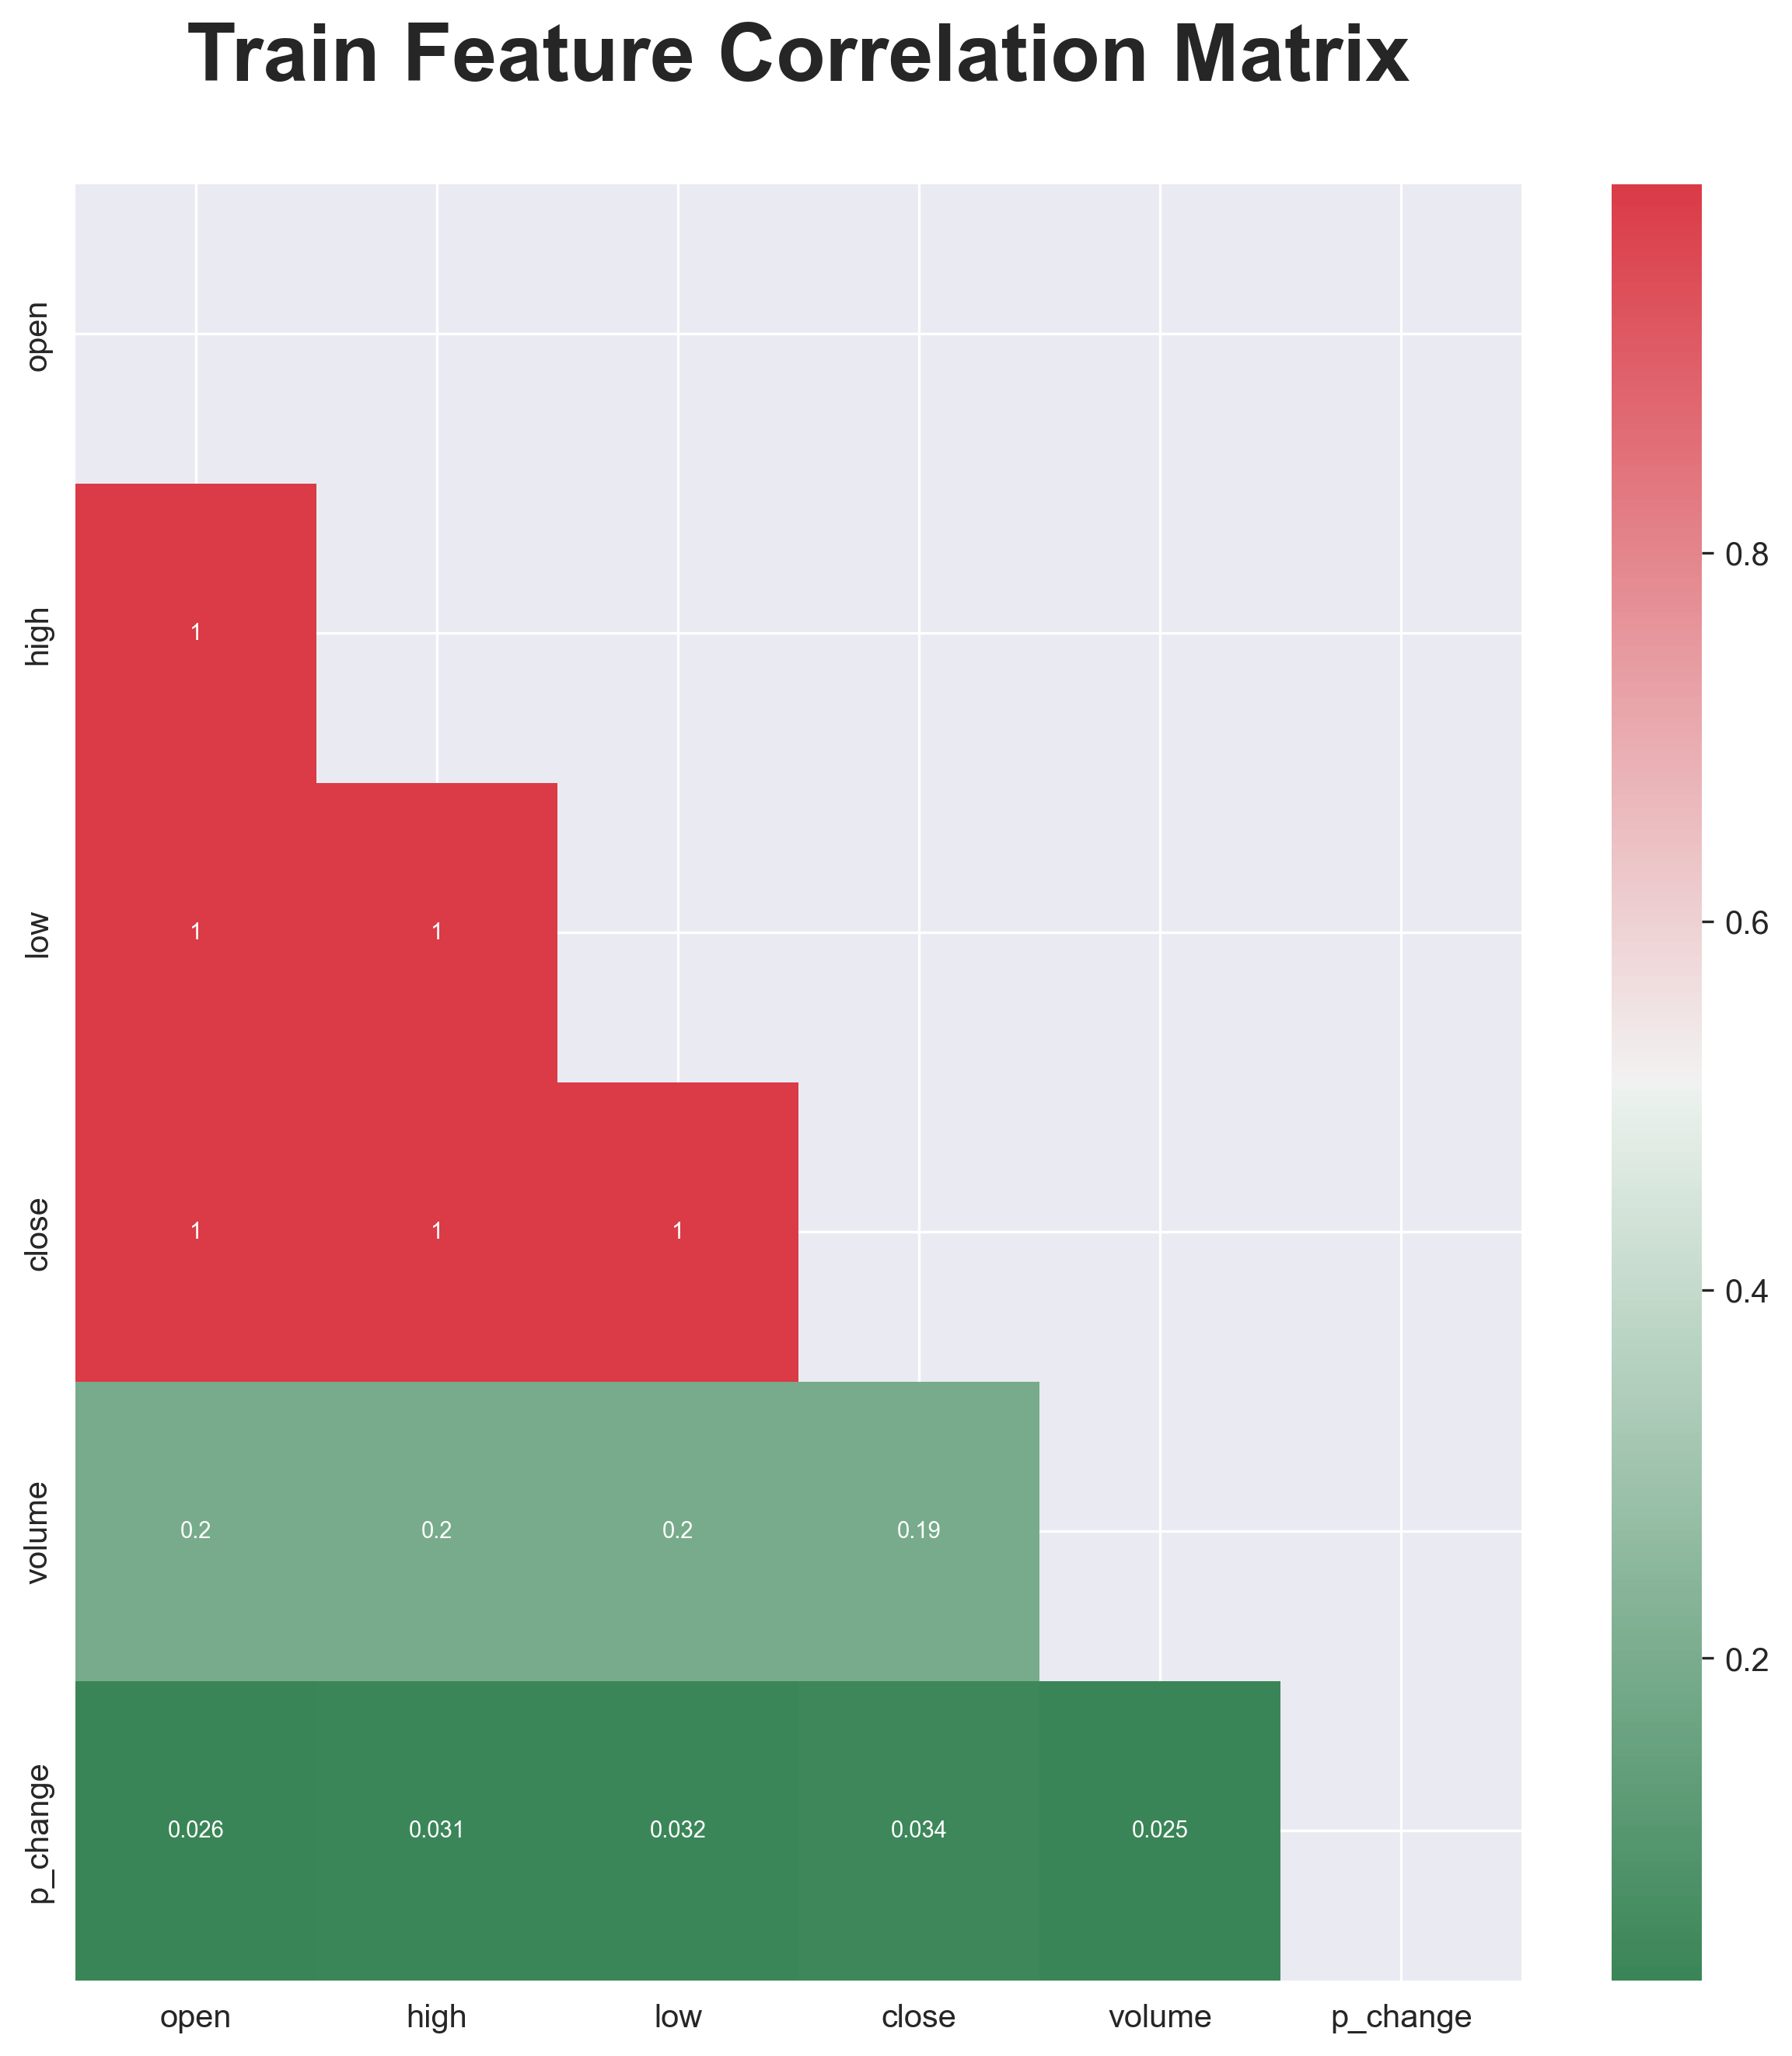

In [15]:
features=[f for f in train_data.columns if train_data[f].astype!='O' and f not in ['forecast']]
print(features)

corr = train_data[features].corr(numeric_only=True)
plt.figure(figsize = (10, 10), dpi = 300)

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, mask = mask, cmap = sns.diverging_palette(500, 10, as_cmap=True), annot = True, annot_kws = {'size' : 7})
plt.title('Train Feature Correlation Matrix\n', fontsize = 25, weight = 'bold')
plt.show()

## Data Cleaning

### Bool to Num

In [16]:
train_data.drop(columns=['date'],inplace=True)
test_data.drop(columns=['date'],inplace=True)

train_data["forecast"]=train_data["forecast"].astype(int)
test_data["forecast"]=test_data["forecast"].astype(int)

## Handling Missing Values

### Missing Numerical features

In [17]:
miss_cont=[feature for feature in train_data.columns if train_data[feature].isnull().sum()>0 and train_data[feature].dtype!='O' and feature not in ['forecast']]
print(miss_cont)

[]


In [18]:
# Calculate the missing percentages for both train and test data
train_missing_pct = train_data[miss_cont].isnull().mean() * 100
test_missing_pct = test_data[miss_cont].isnull().mean() * 100

# Combine the missing percentages for train and test data into a single dataframe
missing_pct_df = pd.concat([train_missing_pct, test_missing_pct], axis=1, keys=['Train %', 'Test%'])

# Print the missing percentage dataframe
print(missing_pct_df)

Empty DataFrame
Columns: [Train %, Test%]
Index: []


## Feature Engineering

In [19]:
num_feat=[f for f in train_data.columns if train_data[f].dtype!="O" and train_data[f].nunique()>10] # The rest are discrete/categorical
num_feat

['open', 'high', 'low', 'close', 'volume', 'p_change']

In [20]:
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler, PowerTransformer, FunctionTransformer
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, accuracy_score

# Below are the functions to decide the decision boundaries in order to maximize Accuracy/ f1-score
def f1_cutoff(precisions, recalls, thresholds):
    a=precisions*recalls/(recalls+precisions)
    b=sorted(zip(a,thresholds))
    return b[-1][1]
def acc_cutoff(y_valid, y_pred_valid):
    y_valid=np.array(y_valid)
    y_pred_valid=np.array(y_pred_valid)
    fpr, tpr, threshold = metrics.roc_curve(y_valid, y_pred_valid)
    pred_valid = pd.DataFrame({'label': y_pred_valid})
    thresholds = np.array(threshold)
    pred_labels = (pred_valid['label'].values > thresholds[:, None]).astype(int)
    acc_scores = (pred_labels == y_valid).mean(axis=1)
    acc_df = pd.DataFrame({'threshold': threshold, 'test_acc': acc_scores})
    acc_df.sort_values(by='test_acc', ascending=False, inplace=True)
    cutoff = acc_df.iloc[0, 0]
    return cutoff

sc=MinMaxScaler()
unimportant_features=[]
table = PrettyTable()
dt_params= {'min_samples_split': 80, 'min_samples_leaf': 30, 'max_depth': 8, 'criterion': 'absolute_error'}

table.field_names = ['Original Feature', 'Original Accuracy(CV-TRAIN)', 'Transformed Feature', 'Tranformed Accuracy(CV-TRAIN)']
for col in num_feat:
    
    # Log Transformation after MinMax Scaling(keeps data between 0 and 1)
    train_data["log_"+col]=np.log1p(sc.fit_transform(train_data[[col]]))
    test_data["log_"+col]=np.log1p(sc.transform(test_data[[col]]))
    
    # Square Root Transformation
    train_data["sqrt_"+col]=np.sqrt(sc.fit_transform(train_data[[col]]))
    test_data["sqrt_"+col]=np.sqrt(sc.transform(test_data[[col]]))
    
    # Box-Cox transformation
    transformer = PowerTransformer(method='box-cox')
    train_data["bx_cx_"+col] = transformer.fit_transform(sc.fit_transform(train_data[[col]])+1) # adjusted to make it +ve
    test_data["bx_cx_"+col] = transformer.transform(sc.transform(test_data[[col]])+1)
    
    # Yeo-Johnson transformation
    transformer = PowerTransformer(method='yeo-johnson')
    train_data["y_J_"+col] = transformer.fit_transform(train_data[[col]])
    test_data["y_J_"+col] = transformer.transform(test_data[[col]])
    
    # Power transformation, 0.25
    power_transform = lambda x: np.power(x, 0.25) 
    transformer = FunctionTransformer(power_transform)
    train_data["pow_"+col] = transformer.fit_transform(sc.fit_transform(train_data[[col]]))
    test_data["pow_"+col] = transformer.transform(sc.transform(test_data[[col]]))
    
    # Power transformation, 0.1
    power_transform = lambda x: np.power(x, 0.1) 
    transformer = FunctionTransformer(power_transform)
    train_data["pow2_"+col] = transformer.fit_transform(sc.fit_transform(train_data[[col]]))
    test_data["pow2_"+col] = transformer.transform(sc.transform(test_data[[col]]))
    
    # log to power transformation
    train_data["log_pow2"+col]=np.log1p(train_data["pow2_"+col])
    test_data["log_pow2"+col]=np.log1p(test_data["pow2_"+col])
    
    temp_cols=[col,"log_"+col,"sqrt_"+col, "bx_cx_"+col,"y_J_"+col ,"pow_"+col,"pow2_"+col,"log_pow2"+col ]
    
    # Fill na becaue, it would be Nan if the vaues are negative and a transformation applied on it
    train_data[temp_cols]=train_data[temp_cols].fillna(0)
    test_data[temp_cols]=test_data[temp_cols].fillna(0)
    
    #Apply PCA on  the features and compute an additional column
    pca=TruncatedSVD(n_components=1)
    x_pca_train=pca.fit_transform(train_data[temp_cols])
    x_pca_test=pca.transform(test_data[temp_cols])
    x_pca_train=pd.DataFrame(x_pca_train, columns=[col+"_pca_comb"])
    x_pca_test=pd.DataFrame(x_pca_test, columns=[col+"_pca_comb"])
    temp_cols.append(col+"_pca_comb")
    #print(temp_cols)
    
    train_data=pd.concat([train_data,x_pca_train],axis='columns')
    test_data=pd.concat([test_data,x_pca_test],axis='columns')
    
    # See which transformation along with the original is giving you the best univariate fit with target
    kf=KFold(n_splits=10, shuffle=True, random_state=42)
    
    ACC=[]
    
    for f in temp_cols:
        X=train_data[[f]].values
        y=train_data["forecast"].values
        
        acc=[]
        for train_idx, val_idx in kf.split(X,y):
            X_train,y_train=X[train_idx],y[train_idx]
            x_val,y_val=X[val_idx],y[val_idx]
            
            model=LogisticRegression()
#             model=DecisionTreeRegressor(**dt_params)
            model.fit(X_train,y_train)
            y_pred=model.predict_proba(x_val)[:,1]
            precisions,recalls, thresholds=precision_recall_curve(y_val,y_pred)
#             cutoff=f1_cutoff(precisions,recalls, thresholds)
            cutoff=acc_cutoff(y_val,y_pred)
#             print(cutoff)
            predicted =pd.DataFrame()
            predicted["forecast"] = y_pred
            y_pred=np.where(predicted["forecast"]>float(cutoff),1,0)
            acc.append(accuracy_score(y_val,y_pred))
        ACC.append((f,np.mean(acc)))
        if f==col:
            orig_acc=np.mean(acc)
    best_col, best_acc=sorted(ACC, key=lambda x:x[1], reverse=True)[0]
    
    cols_to_drop = [f for f in temp_cols if  f!= best_col]
#     print(cols_to_drop)
    final_selection=[f for f in temp_cols if f not in cols_to_drop]
    if cols_to_drop:
        unimportant_features=unimportant_features+cols_to_drop
    table.add_row([col,orig_acc,best_col ,best_acc])
print(table)    

+------------------+-----------------------------+---------------------+-------------------------------+
| Original Feature | Original Accuracy(CV-TRAIN) | Transformed Feature | Tranformed Accuracy(CV-TRAIN) |
+------------------+-----------------------------+---------------------+-------------------------------+
|       open       |      0.5458505593385213     |         open        |       0.5458505593385213      |
|       high       |      0.5446802042801556     |         high        |       0.5446802042801556      |
|       low        |      0.5442910992217899     |         low         |       0.5442910992217899      |
|      close       |      0.5439004742217899     |        close        |       0.5439004742217899      |
|      volume      |      0.5591287694552529     |        volume       |       0.5591287694552529      |
|     p_change     |      0.5599130593385213     |       p_change      |       0.5599130593385213      |
+------------------+-----------------------------+-----

## Clustering-One Hot Transformation

['log_open', 'sqrt_open', 'bx_cx_open', 'y_J_open', 'pow_open', 'pow2_open', 'log_pow2open', 'open_pca_comb']


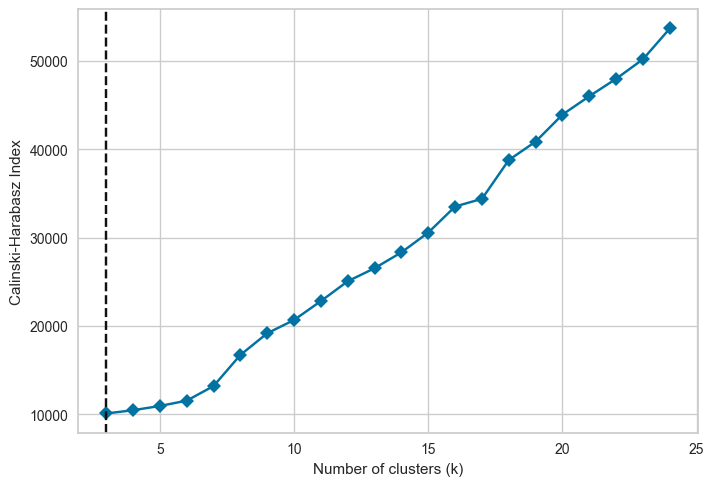

3
['log_high', 'sqrt_high', 'bx_cx_high', 'y_J_high', 'pow_high', 'pow2_high', 'log_pow2high', 'high_pca_comb']


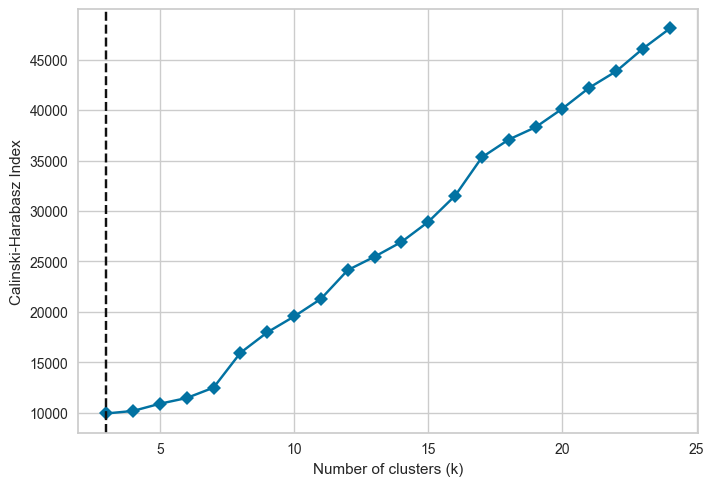

3
['log_low', 'sqrt_low', 'bx_cx_low', 'y_J_low', 'pow_low', 'pow2_low', 'log_pow2low', 'low_pca_comb']


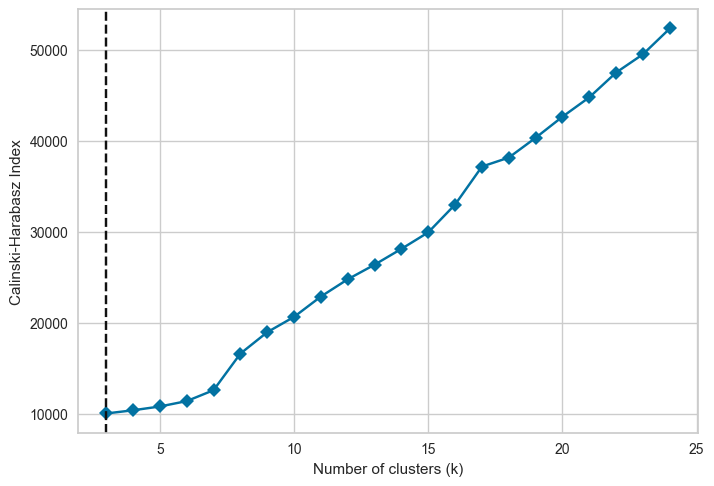

3
['log_close', 'sqrt_close', 'bx_cx_close', 'y_J_close', 'pow_close', 'pow2_close', 'log_pow2close', 'close_pca_comb']


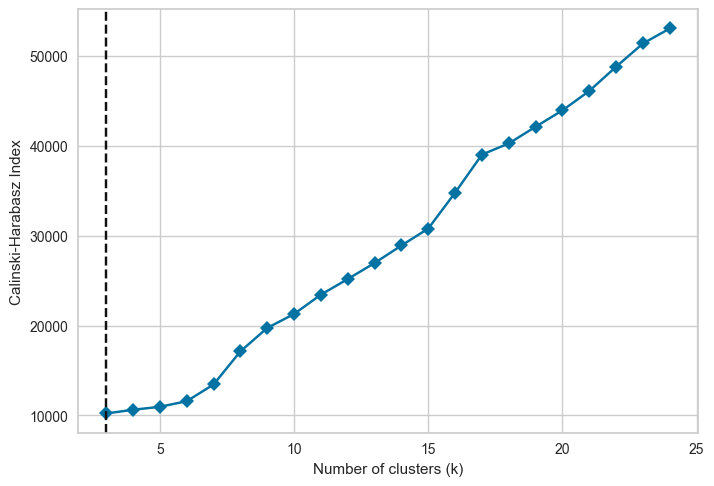

3
['log_volume', 'sqrt_volume', 'bx_cx_volume', 'y_J_volume', 'pow_volume', 'pow2_volume', 'log_pow2volume', 'volume_pca_comb']


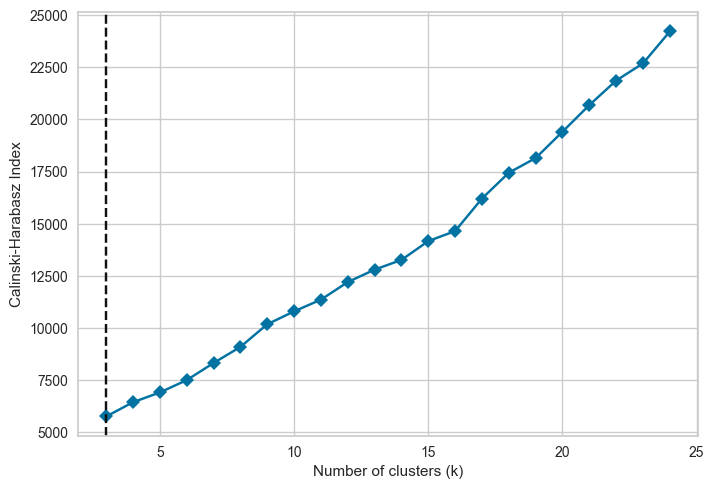

3
['log_p_change', 'sqrt_p_change', 'bx_cx_p_change', 'y_J_p_change', 'pow_p_change', 'pow2_p_change', 'log_pow2p_change', 'p_change_pca_comb']


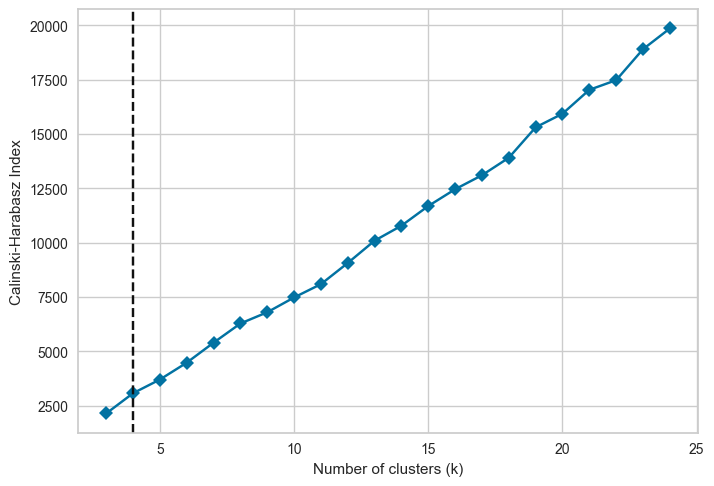

4
+----------------------------+--------------------+
|    Cluster WOE Feature     |   MAE(CV-TRAIN)    |
+----------------------------+--------------------+
|   open_unimp_cluster_WOE   | 0.528289153696498  |
|   high_unimp_cluster_WOE   | 0.5286797786964981 |
|   low_unimp_cluster_WOE    | 0.529070403696498  |
|  close_unimp_cluster_WOE   | 0.529070403696498  |
|  volume_unimp_cluster_WOE  | 0.536498358463035  |
| p_change_unimp_cluster_WOE | 0.5357262281128404 |
+----------------------------+--------------------+


In [21]:
from yellowbrick.cluster import KElbowVisualizer

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.cluster import KMeans

def OHE(train,test,cols,target):
    combined = pd.concat([train, test], axis=0)
    for col in cols:
        one_hot = pd.get_dummies(combined[col])
        counts = combined[col].value_counts()
        min_count_category = counts.idxmin()
        one_hot = one_hot.drop(min_count_category, axis=1)
        combined = pd.concat([combined, one_hot], axis="columns")
        combined = combined.drop(col, axis=1)
        combined = combined.loc[:, ~combined.columns.duplicated()]
    
    # split back to train and test dataframes
    train_ohe = combined[:len(train)]
    test_ohe = combined[len(train):]
    test_ohe.reset_index(inplace=True,drop=True)
    
    return train_ohe, test_ohe

table = PrettyTable()
table.field_names = ['Cluster WOE Feature', 'MAE(CV-TRAIN)']

for col in num_feat:
    sub_set=[f for f in unimportant_features if col in f]
    print(sub_set)
    
    temp_train=train_data[sub_set]
    temp_test=test_data[sub_set]
    
    sc=StandardScaler()
    temp_train=sc.fit_transform(temp_train)
    temp_test=sc.transform(temp_test)
    model = KMeans()

    # Initialize the KElbowVisualizer with the KMeans model and desired range of clusters
    visualizer = KElbowVisualizer(model, k=(3, 25), metric='calinski_harabasz', timings=False)
    visualizer.fit(np.array(temp_train))
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Calinski-Harabasz Index')
    plt.show()

    ideal_clusters = visualizer.elbow_value_
    if ideal_clusters is None:
        ideal_clusters = 25
    print(ideal_clusters)
    
    kmeans = KMeans(n_clusters=ideal_clusters)
    kmeans.fit(np.array(temp_train))
    labels_train = kmeans.labels_

    train_data[col+'_OHE_cluster'] = labels_train
    test_data[col+'_OHE_cluster'] = kmeans.predict(np.array(temp_test))
    
    # Also, making a copy to do mean encoding followed by a log transformation
    train_data[col+"_unimp_cluster_WOE"]=train_data[col+'_OHE_cluster']
    test_data[col+"_unimp_cluster_WOE"]=test_data[col+'_OHE_cluster'] 
    cat_labels=cat_labels=np.log1p(train_data.groupby([col+"_unimp_cluster_WOE"])['forecast'].mean())
    cat_labels2=cat_labels.to_dict()
    train_data[col+"_unimp_cluster_WOE"]=train_data[col+"_unimp_cluster_WOE"].map(cat_labels2)
    test_data[col+"_unimp_cluster_WOE"]=test_data[col+"_unimp_cluster_WOE"].map(cat_labels2)

    X=train_data[[col+"_unimp_cluster_WOE"]].values
    y=train_data["forecast"].values

    ACC=[]
    
    for train_idx, val_idx in kf.split(X,y):
        X_train,y_train=X[train_idx],y[train_idx]
        x_val,y_val=X[val_idx],y[val_idx]

        model=LogisticRegression()
        model.fit(X_train,y_train)
        y_pred=model.predict_proba(x_val)[:,1]
        precisions,recalls, thresholds=precision_recall_curve(y_val,y_pred)
        cutoff=acc_cutoff(y_val,y_pred)
        # print(cutoff)
        predicted =pd.DataFrame()
        predicted["forecast"] = y_pred
        y_pred=np.where(predicted["forecast"]>float(cutoff),1,0)
        ACC.append(accuracy_score(y_val,y_pred))
        
    table.add_row([col+"_unimp_cluster_WOE",np.mean(ACC)])
    
    train_data[col+'_OHE_cluster']=col+"_OHE_"+train_data[col+'_OHE_cluster'].astype(str)
    test_data[col+'_OHE_cluster']=col+"_OHE_"+test_data[col+'_OHE_cluster'].astype(str)
    train_data, test_data=OHE(train_data,test_data,[col+'_OHE_cluster'],"forecast")
    
print(table)

## Multiplicative Features

In [22]:
from itertools import combinations
feature_pairs = list(combinations(num_feat, 2))

table = PrettyTable()
table.field_names = ['Pair Features', 'Accuracy(CV-TRAIN)', "Selected"]

selected_features=[]
max_product=float('-inf')
for pair in feature_pairs:
    col1, col2 = pair
    # print(pair)
    product_col_train = train_data[col1] * train_data[col2]
    product_col_test= test_data[col1] * test_data[col2]
    name=f'{col1}_{col2}_product'
    train_data[name] = product_col_train
    test_data[name] = product_col_test
    max_product = max(max_product, product_col_train.max())

    kf=KFold(n_splits=5, shuffle=True, random_state=42)
    MAE=[]
    X=train_data[[name]].values
    y=train_data["forecast"].values

    ACC=[]
    for train_idx, val_idx in kf.split(X,y):
        X_train,y_train=X[train_idx],y[train_idx]
        x_val,y_val=X[val_idx],y[val_idx]

        model=LogisticRegression()
        model.fit(X_train,y_train)
        y_pred=model.predict_proba(x_val)[:,1]
        precisions,recalls, thresholds=precision_recall_curve(y_val,y_pred)
        cutoff=acc_cutoff(y_val,y_pred)
        # print(cutoff)
        predicted =pd.DataFrame()
        predicted["forecast"] = y_pred
        y_pred=np.where(predicted["forecast"]>float(cutoff),1,0)
        ACC.append(accuracy_score(y_val,y_pred))
        
    if np.mean(ACC)<0.7:
        unimportant_features.append(name)
        selected="No"
    else:
        selected_features.append(pair)
        selected="Yes"
        
    table.add_row([pair,np.mean(ACC),selected ])
    
table.sortby = 'Accuracy(CV-TRAIN)'
table.reversesort = True

print(table)

+------------------------+--------------------+----------+
|     Pair Features      | Accuracy(CV-TRAIN) | Selected |
+------------------------+--------------------+----------+
| ('close', 'p_change')  | 0.5540494030214426 |    No    |
|  ('low', 'p_change')   | 0.5540494030214425 |    No    |
| ('volume', 'p_change') | 0.5536572551169591 |    No    |
|  ('open', 'p_change')  | 0.5532696759259259 |    No    |
|  ('high', 'p_change')  | 0.5532689144736842 |    No    |
|   ('open', 'volume')   | 0.5513119822124757 |    No    |
|   ('low', 'volume')    | 0.5513112207602339 |    No    |
|   ('high', 'volume')   | 0.5509213572124756 |    No    |
|  ('close', 'volume')   | 0.5509213572124756 |    No    |
|    ('open', 'high')    | 0.5360951206140351 |    No    |
|    ('open', 'low')     | 0.5360943591617934 |    No    |
|   ('open', 'close')    | 0.5357044956140351 |    No    |
|    ('low', 'close')    | 0.5353146320662768 |    No    |
|    ('high', 'low')     | 0.5353146320662768 |    No   

## Less Important Features

In [23]:
print("Number of Unimportant Features are ",len(unimportant_features))

Number of Unimportant Features are  63


In [24]:
test_data.reset_index(inplace=True,drop=True)

for col in cont_cols:
    sub_set=[f for f in unimportant_features if col in f]
    
    existing=[f for f in train_data.columns if f in sub_set]
    temp_train=train_data[existing]
    temp_test=test_data[existing]
    
    sc=StandardScaler()
    temp_train=sc.fit_transform(temp_train)
    temp_test=sc.transform(temp_test)
    
    pca=TruncatedSVD(n_components=1)
    x_pca_train=pca.fit_transform(temp_train)
    x_pca_test=pca.transform(temp_test)
    x_pca_train=pd.DataFrame(x_pca_train, columns=[col+"_pca_comb_unimp"])
    x_pca_test=pd.DataFrame(x_pca_test, columns=[col+"_pca_comb_unimp"])
    
    train_data=pd.concat([train_data,x_pca_train],axis='columns')
    test_data=pd.concat([test_data,x_pca_test],axis='columns')
    
    for f in sub_set:
        if f in train_data.columns and f not in cont_cols:
            train_data=train_data.drop(columns=[f])
            test_data=test_data.drop(columns=[f])

In [25]:
print("Number of Unimportant Features are ",len(unimportant_features))

Number of Unimportant Features are  63


## Feature Selection

### Hot Plot

In [26]:
num_derived_list=[]
for f1 in train_data.columns:
    for f2 in num_feat:
        if f2 in f1:
            num_derived_list.append(f1)
num_derived_list=[*set(num_derived_list)]      
                       
corr = train_data[num_derived_list].corr()
plt.figure(figsize = (40, 40), dpi = 300)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask = mask, cmap = sns.diverging_palette(500, 10, as_cmap=True), annot = True, annot_kws = {'size' : 8})
plt.title('Post-Feature Engineering Correlation Matrix\n', fontsize = 10, weight = 'bold')
plt.show()

### Reduce Features

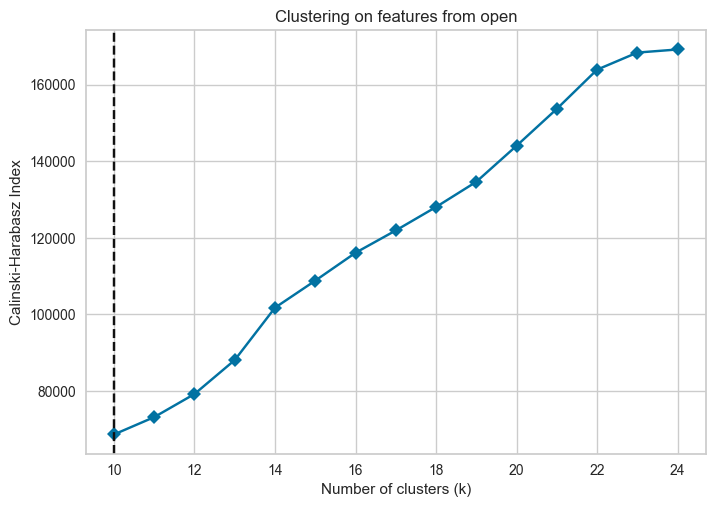

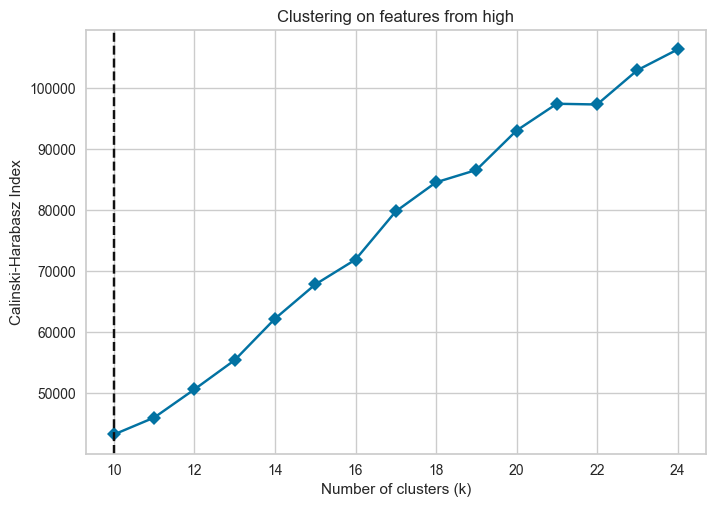

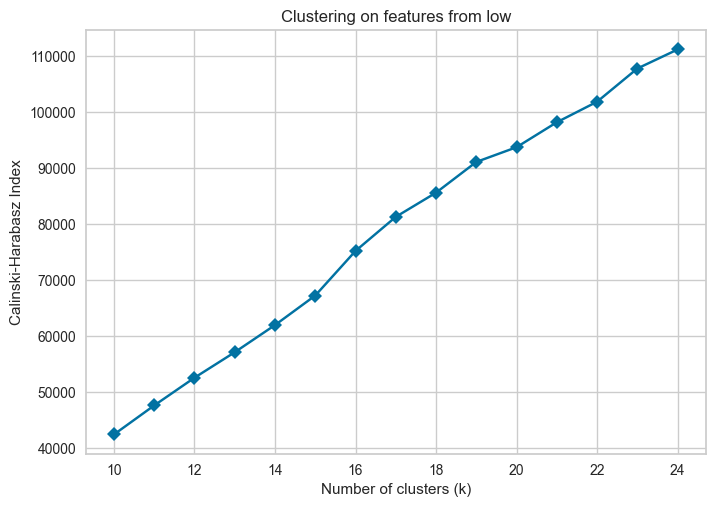

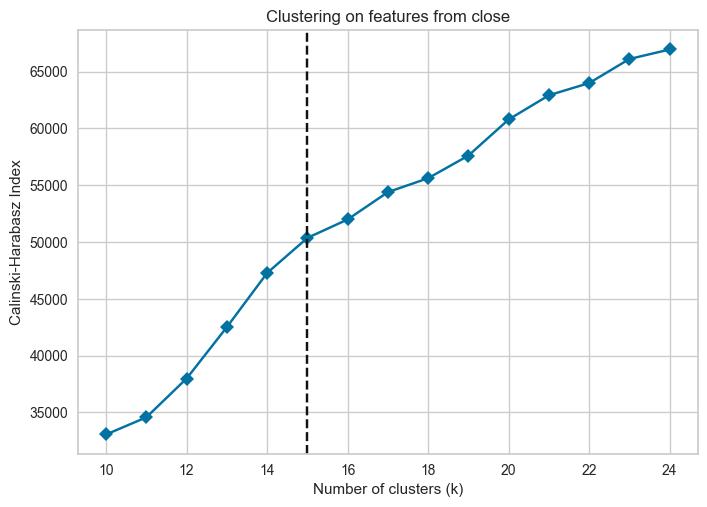

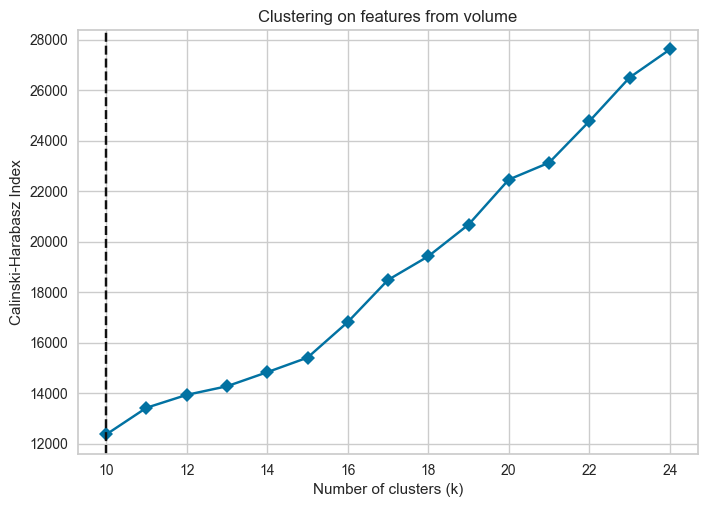

All features for p_change have correlation less than threshold
+----------+---------------------------+----------------------------------+
| Original | Final Transformed feature | Accuray(CV)- Logistic Regression |
+----------+---------------------------+----------------------------------+
|   open   |     open_final_cluster    |        0.541556256091618         |
|   high   |     high_final_cluster    |        0.5403760051169592        |
|   low    |     low_final_cluster     |        0.5368801778752437        |
|  close   |    close_final_cluster    |        0.5477948343079923        |
|  volume  |       log_pow2volume      |        0.5532628228557505        |
| p_change |   All features selected   |                --                |
+----------+---------------------------+----------------------------------+


In [27]:
final_drop_list=[]

table = PrettyTable()
table.field_names = ['Original', 'Final Transformed feature', "Accuray(CV)- Logistic Regression"]

threshold=0.8
# It is possible that multiple parent features share same child features, so storing selected features to avoid selecting the same feature again
best_cols=[]

for col in num_feat:
    sub_set=[f for f in num_derived_list if col in f]
    # print(sub_set)
    
    correlated_features = []

    # Loop through each feature
    for i, feature in enumerate(sub_set):
        # Check correlation with all remaining features
        for j in range(i+1, len(sub_set)):
            correlation = np.abs(train_data[feature].corr(train_data[sub_set[j]]))
            # If correlation is greater than threshold, add to list of highly correlated features
            if correlation > threshold:
                correlated_features.append(sub_set[j])

    # Remove duplicate features from the list
    correlated_features = list(set(correlated_features))
    if len(correlated_features)>1:

        temp_train=train_data[correlated_features]
        temp_test=test_data[correlated_features]
        # Scale before applying PCA
        sc=StandardScaler()
        temp_train=sc.fit_transform(temp_train)
        temp_test=sc.transform(temp_test)

        # Initiate PCA
        pca=TruncatedSVD(n_components=1)
        x_pca_train=pca.fit_transform(temp_train)
        x_pca_test=pca.transform(temp_test)
        x_pca_train=pd.DataFrame(x_pca_train, columns=[col+"_pca_comb_final"])
        x_pca_test=pd.DataFrame(x_pca_test, columns=[col+"_pca_comb_final"])
        train_data=pd.concat([train_data,x_pca_train],axis='columns')
        test_data=pd.concat([test_data,x_pca_test],axis='columns')

        # Clustering
        model = KMeans()

        # Initialize the KElbowVisualizer with the KMeans model and desired range of clusters
        visualizer = KElbowVisualizer(model, k=(10, 25), metric='calinski_harabasz', timings=False)

        # Fit the visualizer to the data
        visualizer.fit(np.array(temp_train))
        plt.xlabel('Number of clusters (k)')
        plt.ylabel('Calinski-Harabasz Index')
        plt.title("Clustering on features from "+col)
        plt.show()

        ideal_clusters = visualizer.elbow_value_
        
        if ideal_clusters is None:
            ideal_clusters=10

        # print(ideal_clusters)
        kmeans = KMeans(n_clusters=ideal_clusters)
        kmeans.fit(np.array(temp_train))
        labels_train = kmeans.labels_

        train_data[col+'_final_cluster'] = labels_train
        test_data[col+'_final_cluster'] = kmeans.predict(np.array(temp_test))

        cat_labels=cat_labels=np.log1p(train_data.groupby([col+"_final_cluster"])['forecast'].mean())
        cat_labels2=cat_labels.to_dict()
        train_data[col+"_final_cluster"]=train_data[col+"_final_cluster"].map(cat_labels2)
        test_data[col+"_final_cluster"]=test_data[col+"_final_cluster"].map(cat_labels2)

        correlated_features=correlated_features+[col+"_pca_comb_final",col+"_final_cluster"]
        # See which transformation along with the original is giving you the best univariate fit with target
        kf=KFold(n_splits=5, shuffle=True, random_state=42)

        ACC=[]

        for f in correlated_features:
            X=train_data[[f]].values
            y=train_data["forecast"].values

            acc=[]
            for train_idx, val_idx in kf.split(X,y):
                X_train,y_train=X[train_idx],y[train_idx]
                x_val,y_val=X[val_idx],y[val_idx]

                model=LogisticRegression()
                model.fit(X_train,y_train)
                y_pred=model.predict_proba(x_val)[:,1]
                precisions,recalls, thresholds=precision_recall_curve(y_val,y_pred)
                cutoff=acc_cutoff(y_val,y_pred)
                predicted =pd.DataFrame()
                predicted["forecast"] = y_pred
                y_pred=np.where(predicted["forecast"]>float(cutoff),1,0)
                acc.append(accuracy_score(y_val,y_pred))

            if f not in best_cols:
                ACC.append((f,np.mean(acc)))
        best_col, best_acc=sorted(ACC, key=lambda x:x[1], reverse=True)[0]
        best_cols.append(best_col)

        cols_to_drop = [f for f in correlated_features if  f not in  best_cols]
        if cols_to_drop:
            final_drop_list=final_drop_list+cols_to_drop
        table.add_row([col,best_col ,best_acc])
    else:
        print(f"All features for {col} have correlation less than threshold")
        table.add_row([col,"All features selected" ,"--"])
print(table)      

In [28]:
final_drop_list=[f for f in final_drop_list if f not in cont_cols]
train_data.drop(columns=[*set(final_drop_list)],inplace=True)
test_data.drop(columns=[*set(final_drop_list)],inplace=True)

print(final_drop_list)

['open_unimp_cluster_WOE', 'open_pca_comb_unimp', 'open_OHE_1', 'open_pca_comb_final', 'high_pca_comb_unimp', 'high_OHE_1', 'high_pca_comb_final', 'low_pca_comb_unimp', 'low_OHE_1', 'low_pca_comb_final', 'close_unimp_cluster_WOE', 'close_pca_comb_unimp', 'close_pca_comb_final', 'pow_volume', 'volume_unimp_cluster_WOE', 'sqrt_volume', 'bx_cx_volume', 'volume', 'log_volume', 'y_J_volume', 'volume_pca_comb_final', 'volume_final_cluster']


## Scaling the Data

In [29]:
feature_scale=[feature for feature in train_data.columns if feature not in ['data','forecast']]
print(feature_scale)

scaler=StandardScaler()

train_data[feature_scale]=scaler.fit_transform(train_data[feature_scale])
test_data[feature_scale]=scaler.transform(test_data[feature_scale])

['open', 'high', 'low', 'close', 'p_change', 'pow2_volume', 'log_pow2volume', 'volume_pca_comb', 'open_OHE_2', 'high_unimp_cluster_WOE', 'high_OHE_0', 'low_unimp_cluster_WOE', 'low_OHE_0', 'close_OHE_0', 'close_OHE_1', 'volume_OHE_1', 'volume_OHE_2', 'p_change_unimp_cluster_WOE', 'p_change_OHE_0', 'p_change_OHE_1', 'p_change_OHE_2', 'p_change_pca_comb_unimp', 'open_final_cluster', 'high_final_cluster', 'low_final_cluster', 'close_final_cluster']


In [30]:
X_train=train_data.drop(['forecast'],axis=1)
y_train=train_data['forecast']

X_test=test_data.drop(['forecast'],axis=1)
y_test=test_data['forecast']

print(X_train.shape,X_test.shape)

(2563, 26) (2563, 26)


# Model Development

## Define and Tune Models

In [31]:
import torch
import torch.nn as nn
import torch.optim as optim

from scipy.stats import uniform, randint

import xgboost as xgb
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier, GradientBoostingClassifier, ExtraTreesClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

### LSTM

In [32]:
devices = torch.device("cuda" if torch.cuda.is_available( ) else "cpu")
device = "cpu"

X_train_tensor = torch.Tensor(X_train.values).to(devices)
y_train_tensor = torch.Tensor(y_train.values).to(devices)

X_test_tensor = torch.Tensor(X_test.values).to(devices)
y_test_tensor = torch.Tensor(y_test.values).to(devices)

In [33]:
class LSTM(nn.Module):
    
    def __init__( self ):
        super(LSTM, self).__init__( )
        self.rnn = nn.LSTM(X_train_tensor.shape[1], 128, 3, dropout=0.1)
        self.fc = nn.Linear(128, 1)
        self.sigmoid = nn.Sigmoid( )
    
    def forward( self, x ):
        out, _ = self.rnn(x)
        out = self.sigmoid(self.fc(out))  # 取最后一个时间步的输出
        
        return out

In [34]:
lstm = LSTM().to(devices)

# 定义损失函数和优化器
criterion = nn.BCELoss().to(devices)  # 二元交叉熵损失函数
optimizer = optim.Adam(lstm.parameters(), lr=0.001, betas=(0.9, 0.999), eps=1e-07)

### XGBoost

In [35]:
# # Set up the XGBoost classifier with default hyperparameters
# xgb_params = {
#     'n_estimators': 500,
#     'learning_rate': 0.05,
#     'max_depth': 7,
#     'subsample': 1.0,
#     'colsample_bytree': 1.0,
#     'n_jobs': -1,
#     'eval_metric': 'logloss',
#     'objective': 'binary:logistic',
#     'verbosity': 0,
#     'random_state': 1,
# }
# model = xgb.XGBClassifier(**xgb_params)

# # Define the hyperparameters to tune and their search ranges
# param_dist = {
#     'n_estimators': np.arange(50, 1000,50),
#     'max_depth': np.arange(3, 15,2),
#     'learning_rate': np.arange(0.001, 0.05,0.004),
#     'subsample': [0.1,0.3,0.5,0.7,0.9],
#     'colsample_bytree': [0.1,0.3,0.5,0.7,0.9],
# }

# # Set up the RandomizedSearchCV object with cross-validation
# random_search = RandomizedSearchCV(
#     estimator=model, 
#     param_distributions=param_dist, 
#     cv=3, 
#     n_iter=50, 
#     random_state=1, 
#     n_jobs=-1
# )

# # Fit the RandomizedSearchCV object to the training data
# random_search.fit(X_train, y_train)

# # Print the best hyperparameters and corresponding mean cross-validation score
# print("Best hyperparameters: ", random_search.best_params_)
# print("Best mean cross-validation score: {:.3f}".format(random_search.best_score_))

# # Evaluate the best model on the test data
# best_model = random_search.best_estimator_
# print(best_model)

# xgb_params=random_search.best_params_

In [36]:
xgb_params={
    'subsample': 0.9, 
    'n_estimators': 900, 
    'max_depth': 3, 
    'learning_rate': 0.041, 
    'colsample_bytree': 0.5
}

### CatBoost

In [37]:
# # define the hyperparameter search space
# param_distributions = {
#     'depth':  np.arange(3, 15,2),
#     'learning_rate': np.arange(0.001, 0.02,0.002),
#     'l2_leaf_reg': [0.1, 0.5, 0.7],
#     'random_strength': [0.1, 0.2, 0.3],
#     'max_bin': [100, 150, 200],
#     'grow_policy': ['SymmetricTree', 'Depthwise', 'Lossguide'],
#     'bootstrap_type': ['Bayesian', 'Bernoulli'],
#     'one_hot_max_size': [10, 50, 70],
# }

# # create a CatBoostClassifier model with default parameters
# model = CatBoostClassifier(iterations=200, eval_metric='Accuracy', loss_function='Logloss', task_type='CPU')

# # perform random search with cross-validation
# random_search = RandomizedSearchCV(
#     estimator=model,
#     param_distributions=param_distributions,
#     n_iter=50,  # number of parameter settings that are sampled
#     scoring='neg_log_loss',  # use negative log-loss as the evaluation metric
#     cv=3,  # 5-fold cross-validation
#     verbose=1,
#     random_state=42
# )

# # fit the random search object to the training data
# random_search.fit(X_train, y_train, verbose=0)

# # print the best parameters and best score
# print("Best hyperparameters: ", random_search.best_params_)
# print("Best mean cross-validation score: {:.3f}".format(random_search.best_score_))

# cat_params=random_search.best_params_

In [38]:
cat_params={
    'random_strength': 0.1, 
    'one_hot_max_size': 50, 
    'max_bin': 100, 
    'learning_rate': 0.001, 
    'l2_leaf_reg': 0.1, 
    'grow_policy': 'SymmetricTree', 
    'depth': 5, 
    'bootstrap_type': 'Bayesian'
}

### Logistic

In [39]:
# # define the hyperparameter search space
# param_grid = {
#     'penalty': ['l1', 'l2', 'elasticnet'],
#     'C': [0.001,0.01, 0.1, 1, 10, 100],
#     'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
# }

# # create a LogisticRegression model with default parameters
# model = LogisticRegression(max_iter=1000, random_state=2023)

# # perform grid search with cross-validation
# grid_search = GridSearchCV(
#     estimator=model,
#     param_grid=param_grid,
#     scoring='roc_auc',  # use accuracy as the evaluation metric
#     cv=5,  # 5-fold cross-validation
#     verbose=1,
#     n_jobs=-1
# )

# # fit the grid search object to the training data
# grid_search.fit(X_train, y_train)

# # print the best parameters and best score
# print("Best hyperparameters: ", grid_search.best_params_)
# print("Best mean cross-validation score: {:.3f}".format(grid_search.best_score_))

# lg_params=grid_search.best_params_

In [40]:
lg_params={
    'C': 0.1, 
    'penalty': 'l1', 
    'solver': 'liblinear'
}

### Random Forests

In [41]:
# # define the hyperparameter search space
# param_distributions = {
#     'n_estimators': [100, 200, 300, 400, 500],
#     'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, None],
#     'max_features': ['sqrt', 'log2', None],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'bootstrap': [True, False]
# }

# # create a RandomForestClassifier model with default parameters
# model = RandomForestClassifier(bootstrap=False, max_depth=4, max_features='sqrt',min_samples_leaf=2, min_samples_split=5,n_estimators=341, random_state=42)

# # perform random search with cross-validation
# random_search = RandomizedSearchCV(
#     estimator=model,
#     param_distributions=param_distributions,
#     n_iter=15,  # number of parameter settings that are sampled
#     scoring='accuracy',  # use accuracy as the evaluation metric
#     cv=5,  # 5-fold cross-validation
#     verbose=1,
#     n_jobs=-1,
#     random_state=42
# )

# # fit the random search object to the training data
# random_search.fit(X_train, y_train)

# # print the best parameters and best score
# print("Best hyperparameters: ", random_search.best_params_)
# print("Best mean cross-validation score: {:.3f}".format(random_search.best_score_))

# rf_params=random_search.best_params_

In [42]:
rf_params={
    'n_estimators': 300, 
    'min_samples_split': 10, 
    'min_samples_leaf': 4, 
    'max_features': None, 
    'max_depth': 4, 
    'bootstrap': False
}

### HistGBM

In [43]:
# # Define the hyperparameter grid to search
# param_grid = {
#     'learning_rate': [0.01, 0.05, 0.1, 0.2],
#     'max_depth': [3, 5, 7, 9],
#     'max_leaf_nodes': [15, 31, 63, 127],
#     'min_samples_leaf': [1, 3, 5, 7],
#     'l2_regularization': np.logspace(-4, 1, 6),
#     'max_bins': [32, 64, 128, 256],
#     'random_state': [42]
# }

# # Create a HistGradientBoostingClassifier object
# clf = HistGradientBoostingClassifier(max_iter=2000)

# # Create a RandomizedSearchCV object
# random_search = RandomizedSearchCV(
#     estimator=clf, 
#     param_distributions=param_grid,
#     n_iter=30, # number of parameter settings that are sampled
#     cv=3, # cross-validation generator
#     scoring='accuracy',
#     n_jobs=-1,
#     random_state=42
# )

# # Fit the RandomizedSearchCV object on the training data
# random_search.fit(X_train, y_train)

# # Print the best hyperparameters
# print("Best hyperparameters: ", random_search.best_params_)
# print("Best mean cross-validation score: {:.3f}".format(random_search.best_score_))

# hgb_params=random_search.best_params_

In [44]:
hgb_params={
    'random_state': 42, 
    'min_samples_leaf': 5, 
    'max_leaf_nodes': 63, 
    'max_depth': 3, 
    'max_bins': 64, 
    'learning_rate': 0.05, 
    'l2_regularization': 1.0
}

### GBM

In [45]:
# # Define the hyperparameter search space
# param_dist = {
#     'n_estimators': np.arange(100, 1000, 50),
#     'learning_rate': np.logspace(-4, 0, num=100),
#     'max_depth': [2, 3, 4, 5, 6],
#     'min_samples_split': [2, 3, 4, 5, 6],
#     'min_samples_leaf': [1, 2, 3, 4, 5],
#     'max_features': ['sqrt', 'log2', None]
# }

# # Create the GradientBoostingClassifier model
# model = GradientBoostingClassifier(max_depth=4, max_features='sqrt',min_samples_leaf=2, min_samples_split=5,n_estimators=341, random_state=42)

# # Create the random search object
# random_search = RandomizedSearchCV(
#     estimator=model, 
#     param_distributions=param_dist, 
#     n_iter=100,
#     cv=5, 
#     scoring='accuracy', 
#     n_jobs=-1, 
#     random_state=42
# )

# # Fit the random search object to the data
# random_search.fit(X_train, y_train)

# # Print the best parameters and best score
# print("Best hyperparameters: ", random_search.best_params_)
# print("Best mean cross-validation score: {:.3f}".format(random_search.best_score_))

# gbm_params=random_search.best_params_

In [46]:
gbm_params={
    'n_estimators': 100, 
    'min_samples_split': 3, 
    'min_samples_leaf': 3, 
    'max_features': None, 
    'max_depth': 6, 
    'learning_rate': 0.0003053855508833416
}

### SVM

In [47]:
# # Define the hyperparameter space
# param_distributions = {
#     'C': uniform(0.1, 10),
#     'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
#     'degree': randint(1, 10),
#     'gamma': ['scale', 'auto'] + list(uniform(0.01, 1).rvs(10)),
# }

# # Define the model
# model = SVC(probability=True)

# # Define the random search with cross validation
# random_search = RandomizedSearchCV(
#     estimator=model, 
#     param_distributions=param_distributions, 
#     n_iter=5, 
#     cv=3, 
#     n_jobs=-1, 
#     random_state=1
# )

# # Fit the random search to the data
# random_search.fit(X_train[:1000], y_train[:1000])

# # Print the best parameters and score
# print("Best hyperparameters: ", random_search.best_params_)
# print("Best mean cross-validation score: {:.3f}".format(random_search.best_score_))

# svm_params=random_search.best_params_

In [48]:
svm_params={
    'C': 4.27022004702574, 
    'degree': 9, 
    'gamma': 0.4679224204849852, 
    'kernel': 'sigmoid'
}

### KNN

In [49]:
# # Define the hyperparameter space
# param_distributions = {
#     'n_neighbors': np.arange(2, 20,2),
#     'weights': ['uniform', 'distance'],
#     'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
#     'leaf_size': randint(1, 100),
#     'p': [1, 2],
# }

# # Define the model
# model = KNeighborsClassifier()

# # Define the random search with cross validation
# random_search = RandomizedSearchCV(
#     estimator=model, 
#     param_distributions=param_distributions, 
#     n_iter=20, 
#     cv=5, 
#     n_jobs=-1, 
#     random_state=1
# )

# # Fit the random search to the data
# random_search.fit(X_train, y_train)

# # Print the best parameters and score
# print("Best hyperparameters: ", random_search.best_params_)
# print("Best mean cross-validation score: {:.3f}".format(random_search.best_score_))

# knn_params = random_search.best_params_

In [50]:
knn_params={
    'algorithm': 'brute', 
    'leaf_size': 6, 
    'n_neighbors': 2, 
    'p': 1, 
    'weights': 'distance'
}

### MLP

In [51]:
# # Define the hyperparameter space
# param_distributions = {
#     'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 100)],
#     'activation': ['logistic', 'tanh', 'relu'],
#     'solver': ['lbfgs', 'adam'],
#     'alpha': uniform(0.0001, 0.1),
#     'learning_rate': ['constant', 'invscaling', 'adaptive'],
#     'learning_rate_init': uniform(0.0001, 0.1),
# }

# # Define the model
# model = MLPClassifier(random_state=42, max_iter=1000)

# # Define the random search with cross validation
# random_search = RandomizedSearchCV(
#     estimator=model, 
#     param_distributions=param_distributions, 
#     n_iter=20, 
#     cv=5, 
#     n_jobs=-1, 
#     random_state=1
# )

# # Fit the random search to the data
# random_search.fit(X_train[:1000], y_train[:1000])

# # Print the best parameters and score
# print("Best hyperparameters: ", random_search.best_params_)
# print("Best mean cross-validation score: {:.3f}".format(random_search.best_score_))

# mlp_params = random_search.best_params_

In [52]:
mlp_params={
    'activation': 'tanh', 
    'alpha': 0.06715280400689455, 
    'hidden_layer_sizes': (100, 100), 
    'learning_rate': 'adaptive', 
    'learning_rate_init': 0.0958889530150502, 
    'solver': 'adam'
}

### GPC

In [53]:
# # Define the hyperparameter space
# param_distributions = {
#     "kernel": [1.0 * RBF(l) for l in uniform(0.01, 10).rvs(10)],
#     "optimizer": ["fmin_l_bfgs_b", "fmin_tnc", "fmin_powell"],
#     "max_iter_predict": randint(10, 500),
# }

# # Define the model
# model = GaussianProcessClassifier(random_state=1)

# # Define the random search with cross validation
# random_search = RandomizedSearchCV(
#     estimator=model, 
#     param_distributions=param_distributions, 
#     n_iter=20, 
#     cv=5, 
#     n_jobs=-1, 
#     random_state=1
# )

# # Fit the random search to the data
# random_search.fit(X_train[:1000], y_train[:1000])

# # Print the best parameters and score
# print("Best hyperparameters: ", random_search.best_params_)
# print("Best mean cross-validation score: {:.3f}".format(random_search.best_score_))

# gpc_params = random_search.best_params_

In [54]:
from sklearn.gaussian_process.kernels import RBF

gpc_params={
    'kernel': 1**2 * RBF(length_scale=8.41), 
    'max_iter_predict': 139, 
    'optimizer': 'fmin_l_bfgs_b'
}

### ExtraTrees

In [55]:
# # Define the hyperparameter space
# param_distributions = {
#     'n_estimators': np.arange(100, 1000,100),
#     'max_depth': [None, 5, 10, 15],
#     'max_features': ['sqrt', 'log2'],
#     'min_samples_split': np.arange(2, 10,2),
#     'min_samples_leaf': np.arange(1, 5,1),
#     'bootstrap': [True, False]
# }

# # Define the model
# model = ExtraTreesClassifier(random_state=1)

# # Define the random search with cross validation
# random_search = RandomizedSearchCV(
#     estimator=model, 
#     param_distributions=param_distributions, 
#     n_iter=20, 
#     cv=5, 
#     n_jobs=-1, 
#     random_state=1
# )

# # Fit the random search to the data
# random_search.fit(X_train, y_train)

# # Print the best parameters and score
# print("Best hyperparameters: ", random_search.best_params_)
# print("Best mean cross-validation score: {:.3f}".format(random_search.best_score_))

# et_params = random_search.best_params_

In [56]:
et_params={
    'n_estimators': 700, 
    'min_samples_split': 4, 
    'min_samples_leaf': 3, 
    'max_features': 'sqrt', 
    'max_depth': 5, 
    'bootstrap': False
}

### DecisionTrees

In [57]:
# # Define the hyperparameter space
# param_distributions = {
#     'max_depth': np.arange(2, 50,1),
#     'min_samples_split': np.arange(2, 20,2),
#     'min_samples_leaf': np.arange(1, 10,1),
#     'criterion': ['gini', 'entropy'],
# }

# # Define the model
# model = DecisionTreeClassifier(random_state=42)

# # Define the random search with cross validation
# random_search = RandomizedSearchCV(
#     estimator=model, 
#     param_distributions=param_distributions, 
#     n_iter=50, 
#     cv=5, 
#     n_jobs=-1, 
#     random_state=1
# )

# # Fit the random search to the data
# random_search.fit(X_train, y_train)

# # Print the best parameters and score
# print("Best hyperparameters: ", random_search.best_params_)
# print("Best mean cross-validation score: {:.3f}".format(random_search.best_score_))

# dtc_params = random_search.best_params_

In [58]:
dtc_params={
    'min_samples_split': 10, 
    'min_samples_leaf': 2, 
    'max_depth': 6, 
    'criterion': 'entropy'
}

### AdaBoost

In [59]:
# # Define the hyperparameter space
# param_distributions = {
#     'n_estimators': np.arange(50, 500,50),
#     'learning_rate': [0.01, 0.05, 0.1, 0.5, 1],
#     'algorithm': ['SAMME', 'SAMME.R']
# }

# # Define the model
# model = AdaBoostClassifier(random_state=42)

# # Define the random search with cross validation
# random_search = RandomizedSearchCV(
#     estimator=model, 
#     param_distributions=param_distributions, 
#     n_iter=50, 
#     cv=5, 
#     n_jobs=-1, 
#     random_state=42
# )

# # Fit the random search to the data
# random_search.fit(X_train, y_train)

# # Print the best parameters and score
# print("Best hyperparameters: ", random_search.best_params_)
# print("Best mean cross-validation score: {:.3f}".format(random_search.best_score_))

# # Set the best parameters to the model
# ada_params = random_search.best_params_

In [60]:
ada_params={
    'n_estimators': 250, 
    'learning_rate': 0.1, 
    'algorithm': 'SAMME'
}

### Naive Bayes

In [61]:
# # Define the hyperparameter space
# param_distributions = {
#     'var_smoothing': np.arange(1e-10, 1e-8,1e-9)
# }

# # Define the model
# model = GaussianNB()

# # Define the random search with cross validation
# random_search = RandomizedSearchCV(
#     estimator=model, 
#     param_distributions=param_distributions, 
#     n_iter=50, 
#     cv=5, 
#     n_jobs=-1, 
#     random_state=1
# )

# # Fit the random search to the data
# random_search.fit(X_train, y_train)

# # Print the best parameters and score
# print("Best hyperparameters: ", random_search.best_params_)
# print("Best mean cross-validation score: {:.3f}".format(random_search.best_score_))

# nb_params=random_search.best_params_

In [62]:
nb_params={
    'var_smoothing': 1e-10
}

## Model Selection

In [63]:
class Splitter:
    def __init__(self, kfold=True, n_splits=5):
        self.n_splits = n_splits
        self.kfold = kfold

    def split_data(self, X, y, random_state_list):
        if self.kfold:
            for random_state in random_state_list:
                kf = StratifiedKFold(n_splits=self.n_splits, random_state=random_state, shuffle=True)
                for train_index, val_index in kf.split(X, y):
                    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
                    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
                    yield X_train, X_val, y_train, y_val
        else:
            X_train, X_val = X.iloc[:int(X_train.shape[0]/10)], X.iloc[int(X_train.shape[0]/10):]
            y_train, y_val = y.iloc[:int(X_train.shape[0]/10)], y.iloc[int(X_train.shape[0]/10):]
            yield X_train, X_val, y_train, y_val

class Classifier:
    def __init__(self, n_estimators=100, device="cpu", random_state=0):
        self.n_estimators = n_estimators
        self.device = device
        self.random_state = random_state
        self.models = self._define_model()
        self.len_models = len(self.models)
        
    def _define_model(self):
        xgb_params.update({
            'objective': 'binary:logistic',
            'n_jobs': -1,
            'random_state': self.random_state,
        })
        if self.device == 'gpu':
            xgb_params.update({
            'tree_method' :'gpu_hist',
            'predictor': 'gpu_predictor',
          })

        cat_params.update({
            'task_type': self.device.upper(),
            'random_state': self.random_state,
        })
        
        cat_sym_params = cat_params.copy()
        cat_sym_params['grow_policy'] = 'SymmetricTree'
        cat_dep_params = cat_params.copy()
        cat_dep_params['grow_policy'] = 'Depthwise'
        dt_params= {'min_samples_split': 80, 'min_samples_leaf': 30, 'max_depth': 8, 'criterion': 'gini'}
        
        models = {
            'lstm': lstm,
            # 'xgb': xgb.XGBClassifier(**xgb_params),
            # 'cat': CatBoostClassifier(**cat_params),
            # "cat_sym": CatBoostClassifier(**cat_sym_params),
            # "cat_dep": CatBoostClassifier(**cat_dep_params),
            # 'lg': LogisticRegression(**lg_params),
            # 'rf': RandomForestClassifier(**rf_params,random_state=self.random_state),
            # 'hgb': HistGradientBoostingClassifier(**hgb_params),
            # 'gbm': GradientBoostingClassifier(**gbm_params, loss='deviance', n_iter_no_change=300,random_state=self.random_state),
            # 'svc': SVC(**svm_params, probability=True),
            # 'knn': KNeighborsClassifier(**knn_params),
            # 'mlp': MLPClassifier(**mlp_params,random_state=self.random_state, max_iter=1000),
            # 'gpc': GaussianProcessClassifier(**gpc_params, random_state=self.random_state),
            # 'et': ExtraTreesClassifier(**et_params, random_state=self.random_state),
            # 'dt' : DecisionTreeClassifier(**dt_params,random_state=self.random_state),
            # 'ada': AdaBoostClassifier(**ada_params,random_state=self.random_state),
            # 'nb': GaussianNB(**nb_params)
        }
        
        return models

## Optimizer

In [64]:
import optuna

from functools import partial

class OptunaWeights:
    def __init__(self, random_state):
        self.study = None
        self.weights = None
        self.random_state = random_state

    def _objective(self, trial, y_true, y_preds):
        # Define the weights for the predictions from each model
        weights = [trial.suggest_float(f"weight{n}", 0, 1) for n in range(len(y_preds))]

        # Calculate the weighted prediction
        weighted_pred = np.average(np.array(y_preds).T, axis=1, weights=weights)

        # Calculate the Recall score for the weighted prediction
        precisions,recalls, thresholds=precision_recall_curve(y_true,weighted_pred)
        cutoff=acc_cutoff(y_true,weighted_pred)
        
        y_weight_pred=np.where(weighted_pred>float(cutoff),1,0)        
        score = metrics.accuracy_score(y_true, y_weight_pred)
        return score

    def fit(self, y_true, y_preds, n_trials=2000):
        optuna.logging.set_verbosity(optuna.logging.ERROR)
        sampler = optuna.samplers.CmaEsSampler(seed=self.random_state)
        self.study = optuna.create_study(sampler=sampler, study_name="OptunaWeights", direction='maximize')
        
        objective_partial = partial(self._objective, y_true=y_true, y_preds=y_preds)
        self.study.optimize(objective_partial, n_trials=n_trials)
        self.weights = [self.study.best_params[f"weight{n}"] for n in range(len(y_preds))]

    def predict(self, y_preds):
        assert self.weights is not None, 'OptunaWeights error, must be fitted before predict'
        weighted_pred = np.average(np.array(y_preds).T, axis=1, weights=self.weights)
        return weighted_pred

    def fit_predict(self, y_true, y_preds, n_trials=2000):
        self.fit(y_true, y_preds, n_trials=n_trials)
        return self.predict(y_preds)
    
    def weights(self):
        return self.weights
    
def acc_cutoff_class(y_valid, y_pred_valid):
    y_valid=np.array(y_valid)
    y_pred_valid=np.array(y_pred_valid)
    
    fpr, tpr, threshold = metrics.roc_curve(y_valid, y_pred_valid)
    pred_valid = pd.DataFrame({'label': y_pred_valid})
    thresholds = np.array(threshold)
    
    pred_labels = (pred_valid['label'].values > thresholds[:, None]).astype(int)
    acc_scores = (pred_labels == y_valid).mean(axis=1)
    
    acc_df = pd.DataFrame({'threshold': threshold, 'test_acc': acc_scores})
    acc_df.sort_values(by='test_acc', ascending=False, inplace=True)
    cutoff = acc_df.iloc[0, 0]
    print(f'cutoff: {cutoff}')
    
    y_pred_valid=np.where(y_pred_valid<float(cutoff),0,1)
    return y_pred_valid

## Model Training

In [65]:
import time
import gc
from copy import deepcopy
from torch.utils.data import DataLoader, TensorDataset

kfold = True
n_splits = 1 if not kfold else 10
random_state = 221213
random_state_list = [2140] # used by split_data [71]
n_estimators = 9999 # 9999
early_stopping_rounds = 200
verbose = False

splitter = Splitter(kfold=kfold, n_splits=n_splits)

# Initialize an array for storing test predictions
list_test_preds = []
test_predss = np.zeros(X_test.shape[0])
ensemble_score = []
weights = []
# trained_models = {'lstm':[], 'xgb':[], 'cat':[], 'cat_sym':[], 'cat_dep':[], 'lg':[], 'rf':[], 'hgb':[], 'gbm':[], 'svc':[], 'knn':[], 'mlp':[], 'et':[], 'dt':[], 'ada':[], 'nb':[]}
trained_models = {'lstm':[]}
# trained_models = {'hgb':[], 'gbm':[], 'svc':[], 'knn':[], 'mlp':[], 'nb':[]}
# trained_models = {'xgb':[], 'lg':[]}
# trained_models = {'cat':[], 'cat_sym':[], 'cat_dep':[], 'rf':[], 'et':[], 'dt':[], 'ada':[]}

print("start")

for i, (X_train_, X_val, y_train_, y_val) in enumerate(splitter.split_data(X_train, y_train, random_state_list=random_state_list)):
    n = i % n_splits
    m = i // n_splits
            
    # Get a set of Regressor models
    classifier = Classifier(n_estimators, device, random_state)
    models = classifier.models
    
    # Initialize lists to store oof and test predictions for each base model
    oof_preds = []
    test_preds = []
    
    # Loop over each base model and fit it to the training data, evaluate on validation data, and store predictions
    for name, model in models.items():
        start = time.time()
        if ('cat' in name) or ("xgb" in name):
            model.fit(X_train_, y_train_, eval_set=[(X_val, y_val)], early_stopping_rounds=early_stopping_rounds, verbose=verbose)
        elif name in 'lstm':
#             model.fit(X_train_, y_train_, validation_data=(X_val, y_val),batch_size=5, epochs=50,verbose=verbose)
            epochs = 300
            batch_size = 64
        
            X_train_tensor = torch.Tensor(np.array(X_train_)).to(devices)
            y_train_tensor = torch.Tensor(np.array(y_train_)).to(devices)
            X_val_tensor = torch.Tensor(np.array(X_val)).to(devices)
            y_val_tensor = torch.Tensor(np.array(y_val)).to(devices)

            # Create PyTorch datasets
            train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
            val_dataset = TensorDataset(X_val_tensor, y_val_tensor)

            # Create DataLoader for training and validation
            train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
            val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
            
            model.train()
            
            for epoch in range(epochs):
                for batch_X, batch_y in train_loader:
                    # Transfer data to GPU if available
                    batch_X, batch_y = batch_X.to(devices), batch_y.to(devices)

                    # Forward pass, backward pass, and optimization
                    optimizer.zero_grad()
                    outputs = model(batch_X)
                    
                    outputs = outputs.view(-1)
                    batch_y = batch_y.view(outputs.shape)
                    
                    loss = criterion(outputs, batch_y)
                    loss.backward()
                    optimizer.step()

            # Validation
            model.eval()
            with torch.no_grad():
                for val_batch_X, val_batch_y in val_loader:
                    val_batch_X, val_batch_y = val_batch_X.to(devices), val_batch_y.to(devices)
                    val_outputs = model(val_batch_X)

                    val_outputs = val_outputs.view(-1)
                    val_batch_y = val_batch_y.view(val_outputs.shape)

                    val_loss = criterion(val_outputs, val_batch_y)

        else:
            model.fit(X_train_, y_train_)
        
        if name in 'lstm':
#             test_pred = np.array(model.predict(X_test))[:, 0]
#             y_val_pred = np.array(model.predict(X_val))[:, 0]
            with torch.no_grad():
                model.eval()  # Set the model to evaluation mode
                test_pred = model(X_test_tensor).cpu().numpy()[:, 0]
                y_val_pred = model(X_val_tensor).cpu().numpy()[:, 0]
            
            print(f'Loss: {val_loss}')
            torch.save(model, f'./model/{name}_{n}.pth')
        else:
            test_pred = model.predict_proba(X_test)[:, 1]
            y_val_pred = model.predict_proba(X_val)[:, 1]

        score = accuracy_score(y_val, acc_cutoff_class(y_val, y_val_pred))
        print(f'{name} [FOLD-{n} SEED-{random_state_list[m]}] Accuracy score: {score:.5f} Accuracy time: {time.time() - start:.2f}s')
        
        oof_preds.append(y_val_pred)
        test_preds.append(test_pred)
        
        if name in trained_models.keys():
            trained_models[f'{name}'].append(deepcopy(model))
            
    # Use Optuna to find the best ensemble weights
    optweights = OptunaWeights(random_state=random_state)
    y_val_pred = optweights.fit_predict(y_val.values, oof_preds)
    
    score = accuracy_score(y_val, acc_cutoff_class(y_val, y_val_pred))
    print(f'Ensemble [FOLD-{n} SEED-{random_state_list[m]}] Accuracy score {score:.5f}')
    
    ensemble_score.append(score)
    weights.append(optweights.weights)
    
    test_predss += optweights.predict(test_preds) / (n_splits * len(random_state_list))
    list_test_preds = test_preds
    
    gc.collect()

start
Loss: 3.736259937286377
cutoff: 0.4076269865036011
lstm [FOLD-0 SEED-2140] Accuracy score: 0.53696 Accuracy time: 35.10s
cutoff: 0.4076269865036011
Ensemble [FOLD-0 SEED-2140] Accuracy score 0.53696
Loss: 0.5940604209899902
cutoff: 0.40968310832977295
lstm [FOLD-1 SEED-2140] Accuracy score: 0.53307 Accuracy time: 32.82s
cutoff: 0.40968310832977295
Ensemble [FOLD-1 SEED-2140] Accuracy score 0.53307
Loss: 0.8908202648162842
cutoff: 0.4496522545814514
lstm [FOLD-2 SEED-2140] Accuracy score: 0.58366 Accuracy time: 32.92s
cutoff: 0.4496522545814514
Ensemble [FOLD-2 SEED-2140] Accuracy score 0.58366
Loss: 0.8692832589149475
cutoff: 0.31691595911979675
lstm [FOLD-3 SEED-2140] Accuracy score: 0.62109 Accuracy time: 33.25s
cutoff: 0.31691595911979675
Ensemble [FOLD-3 SEED-2140] Accuracy score 0.62109
Loss: 1.1569292545318604
cutoff: 0.006333019584417343
lstm [FOLD-4 SEED-2140] Accuracy score: 0.61719 Accuracy time: 32.70s
cutoff: 0.006333019584417343
Ensemble [FOLD-4 SEED-2140] Accuracy s

In [66]:
# Calculate the mean Accuracy score of the ensemble
mean_score = np.mean(ensemble_score)
std_score = np.std(ensemble_score)
print(f'Ensemble Accuracy score {mean_score:.5f} ± {std_score:.5f}')

# Print the mean and standard deviation of the ensemble weights for each model
print('--- Model Weights ---')
mean_weights = np.mean(weights, axis=0)
std_weights = np.std(weights, axis=0)

for name, mean_weight, std_weight in zip(models.keys(), mean_weights, std_weights):
    print(f'{name}: {mean_weight:.5f} ± {std_weight:.5f}')

Ensemble Accuracy score 0.65131 ± 0.08894
--- Model Weights ---
lstm: 0.51459 ± 0.00000


In [67]:
precisions,recalls, thresholds=precision_recall_curve(y_val,y_val_pred)
cutoff=acc_cutoff(y_val,y_val_pred)
print(cutoff)

0.29045745730400085


## Feature importance Visualization

In [68]:
def visualize_importance(models, feature_cols, title, top=20):
    try:
        importances = []
        feature_importance = pd.DataFrame()
        for i, model in enumerate(models):
            _df = pd.DataFrame()
            _df["importance"] = model.feature_importances_
            _df["feature"] = pd.Series(feature_cols)
            _df["fold"] = i
            _df = _df.sort_values('importance', ascending=False)
            _df = _df.head(top)
            feature_importance = pd.concat([feature_importance, _df], axis=0, ignore_index=True)

        feature_importance = feature_importance.sort_values('importance', ascending=False)
        # display(feature_importance.groupby(["feature"]).mean().reset_index().drop('fold', axis=1))
        plt.figure(figsize=(12, 10))
        sns.barplot(x='importance', y='feature', data=feature_importance, color='skyblue', errorbar='sd')
        plt.xlabel('Importance', fontsize=14)
        plt.ylabel('Feature', fontsize=14)
        plt.title(f'{title} Feature Importance [Top {top}]', fontsize=18)
        plt.grid(True, axis='x')
        plt.show()
    except AttributeError:
        return
    
for name, models in trained_models.items():
    visualize_importance(models, list(X_train.columns), name)

## Results

In [69]:
list_test_preds = np.where(list_test_preds>cutoff,1,0).astype(bool)

model_name = ['lstm', 'xgb', 'cat', 'cat_sym', 'cat_dep', 'lg', 'rf', 'hgb', 'gbm', 'svc', 'knn', 'mlp', 'et', 'dt', 'ada', 'nb']

merged_predictions = pd.DataFrame()

for i, preds in enumerate(list_test_preds):
    col_name = model_name[i]
    merged_predictions[col_name] = preds

test_predss = merged_predictions.mode(axis=1, dropna=True)[0].astype(bool)

In [70]:
sub = pd.read_csv('../input/spaceship-titanic/sample_submission.csv')

# sub['forecast'] = np.where(test_predss>cutoff,1,0).astype(bool)
sub['forecast'] = test_predss

sub.to_csv('./final_predictions.csv',index=False)
sub.head()

FileNotFoundError: [Errno 2] No such file or directory: '../input/spaceship-titanic/sample_submission.csv'

In [ ]:
sub["forecast"].value_counts()/sub["forecast"].shape[0]

In [ ]:
# sub1=pd.read_csv("/kaggle/working/cat_rf_dt_et_ada.csv")
# sub2=pd.read_csv("/kaggle/working/hgb_gbm_svc_knn_mlp_nb.csv")
# sub3=pd.read_csv("/kaggle/working/xgb_lg.csv")
# sub4=pd.read_csv("/kaggle/working/LSTM.csv")

In [ ]:
# sub_combined=sub1.copy()
# sub_combined['forecast']=sub1['forecast'] | sub2['forecast'] | sub3['forecast'] | sub4["forecast"]

In [ ]:
# sub_combined.to_csv('submission_model.csv',index=False)